### Active Organizational Network Analysis

This notebook contains an active organizational network analysis mainly executed with the library of NetworkX and Netgraph . In detail, the ONA boils down to one concept - the relationship - by applying ONA to understand the denseness of a network in a organization.For example, which nodes are most important in various ways, which communities exist, and so forth. This network is considered as a directed network. Looking at the dataset from a graph analysis perspective:

* Each node represents a active employee in this organization.

* Each edge corresponds to the relationship/connection of two employees that belong to this network. In other words, two employees must have an advice seeking connection in order for them to be connected in the particular network.

Note: This is an active ONA, we deployed an employee network survey to the organization which asked recipients to inventory the top (up to 10) collaborators in their network and indicate which of five types of support they receive including: 

* Financial resources
* Delivering to customers
* Career development
* Navigating change
* Technical expertise


##### Import packages

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import scipy as sp
from netgraph import Graph
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib as matplotlib

%matplotlib inline

##### Read CSV file

In [2]:
# Reading ona active survey data

s_people = pd.read_csv('active_survey_new.csv')
len(s_people)

581

##### EDA for undestanding the ONA survey Data

In [3]:
# look at the a concise summary of a DataFrame. 
# including information about the index data type, column data types, non-null values, and memory usage.

s_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Employee ID_recipient            581 non-null    int64 
 1   Employee ID_adviser              581 non-null    int64 
 2   go to reason                     554 non-null    object
 3   advice area count                581 non-null    int64 
 4   energy level                     580 non-null    object
 5   Employment Type_recipient        581 non-null    object
 6   Position Title_recipient         581 non-null    object
 7   Date in service_recipient        581 non-null    object
 8   On Site Frequency_recipient      581 non-null    object
 9   Business Unit level 1_recipient  581 non-null    object
 10  Business Unit level 2_recipient  581 non-null    object
 11  Employment Type_adviser          581 non-null    object
 12  Position Title_adviser           581

In [4]:
#detect and count missing values (NaNs) in a DataFrame.

s_people.isna().sum()

Employee ID_recipient               0
Employee ID_adviser                 0
go to reason                       27
advice area count                   0
energy level                        1
Employment Type_recipient           0
Position Title_recipient            0
Date in service_recipient           0
On Site Frequency_recipient         0
Business Unit level 1_recipient     0
Business Unit level 2_recipient     0
Employment Type_adviser             0
Position Title_adviser              0
Date in service_adviser             0
On Site Frequency_adviser           0
Business Unit level 1_adviser       0
Business Unit level 2_adviser       0
dtype: int64

Observation:

* The dataset contains 581 rows and 17 columns(features).
* There are 27 missing value (NaNs) in the variable of go to reason.
* One missing value in the variable of energy level.


Let's have a look at statistics of the datasets. First we will check for numerical values and then for categorical values.

In [5]:
# understanding the distribution and summary statistics of the relevanceScore variable

s_people["advice area count"].describe()

count    581.000000
mean       1.903614
std        1.174883
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        5.000000
Name: advice area count, dtype: float64

In [6]:
# understanding summary statistics of the categorical variable of "Business Unit level 2_adviser"

s_people["Business Unit level 2_adviser"].describe()

count                       581
unique                       16
top       Engineering - Brand 2
freq                        202
Name: Business Unit level 2_adviser, dtype: object

In [7]:
# understanding summary statistics of the categorical variable of "Business Unit level 2_recipient"

s_people["Business Unit level 2_recipient"].describe()


count                            581
unique                             6
top       Customer Service - Brand 2
freq                             188
Name: Business Unit level 2_recipient, dtype: object

In [8]:
# understanding summary statistics of the categorical variable of "On Site Frequency_adviser"

s_people["On Site Frequency_adviser"].describe()

count        581
unique         3
top       Hybrid
freq         391
Name: On Site Frequency_adviser, dtype: object

In [9]:
# understanding summary statistics of the categorical variable of "Business Unit level 2_recipient"

s_people["On Site Frequency_recipient"].describe()

count        581
unique         2
top       Hybrid
freq         331
Name: On Site Frequency_recipient, dtype: object

Observations:

Connection Strength - advice area count
* Average count was 1.9 
* Lowest value was 0 whereas greatest value was 5


On-Site
* Approximately 62% of employees are hybrid.


##### Exploratory Data Analysis

Distribution for years of service of senders and receivers

##### Distribution for connection strength

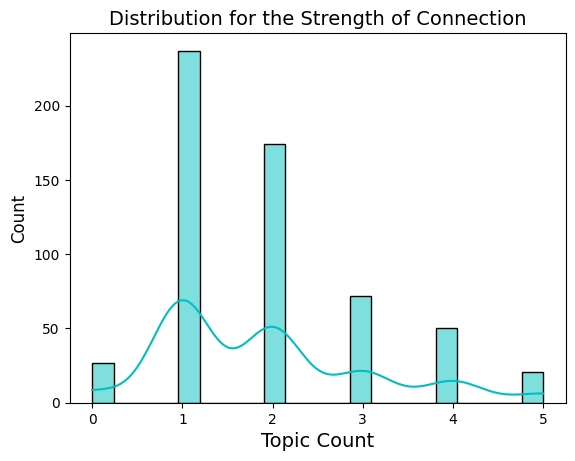

In [11]:
# Plot a histogram to see the distribution of the relevanceScore variable

sns.histplot(x="advice area count", data=s_people, color= "c", alpha=0.5, kde=True)
plt.ylabel('Count', fontsize = 12)
plt.xlabel('Topic Count', fontsize = 14)
plt.title('Distribution for the Strength of Connection', fontsize = 14)
plt.show()

Conclusion:

From the histogram, we found that the distribution of advice topic count is slightly right skewed. Which indicates that majority of data values are on the topic counts of 1 and 2.

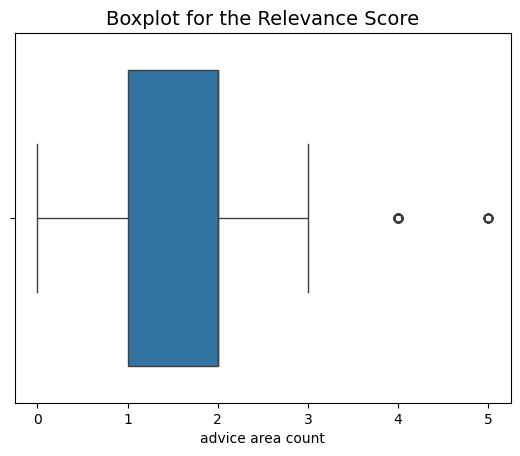

In [12]:
# plot a boxplot to check data points' spread, variability and outliers for advice area variable

sns.boxplot(x=s_people["advice area count"])
plt.title('Boxplot for the Relevance Score', fontsize = 14)
plt.show()

Conclusion:

The boxplot reveals that the middle 50% of the values in this dataset are spread over a range of -- Q3-Q1 = 1 unit --. The IQR is the difference between the third quartile (Q3) and the first quartile (Q1). The plot also shows two potential outlierswhich are the points outside the whiskers with approximately topic count higher than 3, indicating unusual or extreme values in the dataset.

In [13]:
# Plotting a Matrix Plot with data to see the connection strength among business units in the organization

chart = alt.Chart(s_people).mark_rect().encode(
    y='Business Unit level 2_recipient:O',
    x='Business Unit level 2_adviser:O',
    color='advice area count:Q'
).properties(
    title='Connection Strength Matrix Plot',
    width=200,
    height=200
).configure_title(
    fontSize=20,
    
)
chart

alt.Chart(...)

Conclusion:

The connection strength matrix plot reveals: 

* Customer Service Team: Seeking advices from Engineering team , Finance and Marketing business units more than 2 topics.

* Engineering Team: Seeking advices acoss different business functions at the average topic between 1 and 2 topics.

* Leadership: Brand 2 organization leader seek advices within the Brand 2 organization.

* Marketing Team: Seeking advices from Leardership and within the team at the average of 4 topics.

* Product Merchandising: Seeking advices across various business units, especially from Leadership at the average of 5 topics.

* Sales Team: Seeking advices from the Engineering, Leadership and Marketing at the average of 2 - 3 topics.

##### Network Analysis: Part I at Organization Level

##### Visualizing the network graph

Visualization plays a central role in network analysis to help get a qualitative feel for the data.

In [14]:
# The graph is created from the ms_people dataframe of the edges:


# Graph for connection among employees
# Directed graph
CG =nx.from_pandas_edgelist(s_people, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())

# Undirected graph
G =nx.from_pandas_edgelist(s_people, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())

# Graph for connection among departments
# Directed graph
DG= nx.from_pandas_edgelist(s_people, source= "Business Unit level 2_recipient", 
                            target = "Business Unit level 2_adviser", 
                            edge_attr=True, 
                            create_using=nx.DiGraph())

# Undirected graph
GG= nx.from_pandas_edgelist(s_people, source= "Business Unit level 2_recipient", 
                            target = "Business Unit level 2_adviser", 
                            edge_attr=True, 
                            create_using=nx.Graph())


##### Organization Network Graph - Connection among the Business Units

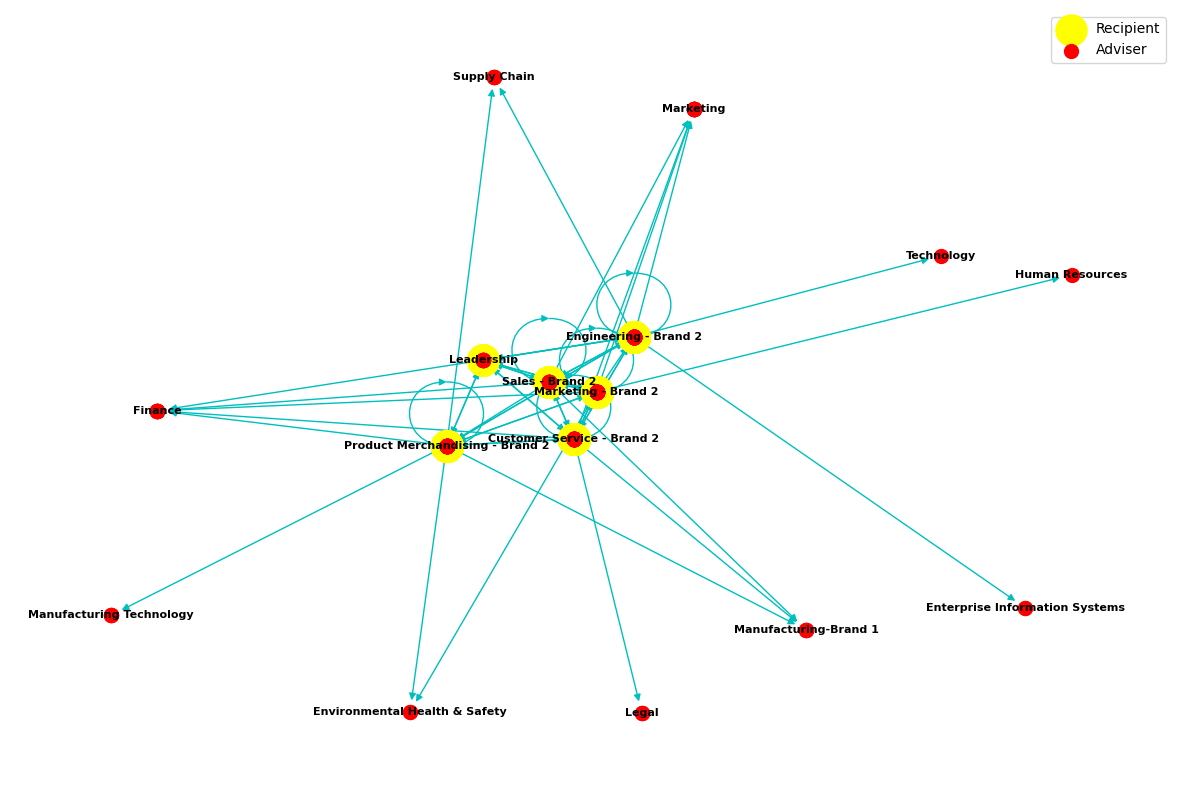

In [15]:
#Draw a graph with directed edges using a colormap and different node sizes.

# Setting layout
layout1= nx.spring_layout(DG, iterations=15, seed=1721)

# Adding nodes
yellow = list(s_people['Business Unit level 2_recipient'])
pinknodes = list(s_people['Business Unit level 2_adviser'])
fig, ax = plt.subplots(figsize=(15, 10))
ax.axis("off")
nx.draw_networkx_nodes(DG, pos=layout1, nodelist=yellow, ax = ax, node_size = 500, 
                       node_color='yellow', label='Recipient')
nx.draw_networkx_nodes(DG, pos=layout1, nodelist=pinknodes, ax = ax, node_size = 100,
                       node_color='red', label='Adviser')

nx.draw_networkx_edges(DG, pos=layout1, width=1, edge_color="c")
nx.draw_networkx_labels(DG, pos=layout1, font_size=8, font_weight='bold')
plt.legend(scatterpoints = 1)
plt.show()

Conclusion:

The network graph shows that each business unit in brand 2 organization not only has relationships within their own team but also has connections among other business units (teams).

In [16]:
# loading hr information

hr_df = pd.read_csv('active_hr_new.csv')
hr_df.columns

Index(['Employee ID', 'On Site Frequency', 'Position Title', 'Date in service',
       'Business Unit level 1', 'Business Unit level 2'],
      dtype='object')

In [19]:
hr_df['Business Unit level 2'].unique()


array(['Engineering - Brand 2', 'Marketing', 'Marketing - Brand 2',
       'Legal', 'Product Merchandising - Brand 2',
       'Customer Service - Brand 2', 'Manufacturing-Brand 1',
       'Leadership', 'Environmental Health & Safety', 'Finance',
       'Enterprise Information Systems', 'Supply Chain',
       'Sales - Brand 2', 'Manufacturing Technology', 'Human Resources',
       'Technology'], dtype=object)

In [20]:
# adding team abbreviation to hr dataframe

abr = []
for i in list(hr_df['Business Unit level 2']):
    if i == 'Customer Service - Brand 2':
        abr.append('CS_B2')
    elif i == 'Engineering - Brand 2':
        abr.append('ENG_B2')
    elif i == 'Marketing - Brand 2':
        abr.append('MKT_B2')
    elif i == 'Product Merchandising - Brand 2':
        abr.append('PM_B2')
    elif i == 'Sales - Brand 2':
         abr.append('Sales_B2')
    elif i == 'Leadership':
         abr.append('Leadership')
    elif i == 'Marketing':
         abr.append('MKT_Corp')
    elif i == 'Technology':
        abr.append('Tech_Corp')
    elif i == 'Legal':
        abr.append('Legal_Corp')
    elif i == 'Finance':
        abr.append('Finance_Corp')
    elif i == 'Supply Chain':
        abr.append('SPC_Crop')
    elif i == 'Human Resources':
        abr.append('HR_Corp')
    elif i == 'Enterprise Information Systems':
        abr.append('EIS_Corp')
    elif i == 'Manufacturing-Brand 1':
        abr.append('MF_Op')
    elif i == 'Environmental Health & Safety':
        abr.append('EnHS_Op')
    else:
        abr.append('MTech_Op')


hr_df['team_abr'] = abr


In [21]:
# creating dic for node attributes

attrs = {}
for i in range(len(hr_df)):
    attrs[hr_df['Employee ID'][i]] = {'Employee ID': hr_df['Employee ID'][i],
                                      'Team_L1' : hr_df['Business Unit level 1'][i],
                                      'Team_L2' : hr_df['Business Unit level 2'][i],
                                      'Abbr' : hr_df['team_abr'][i]
                                      }
    
# adding node attributes to CG

nx.set_node_attributes(CG, attrs)

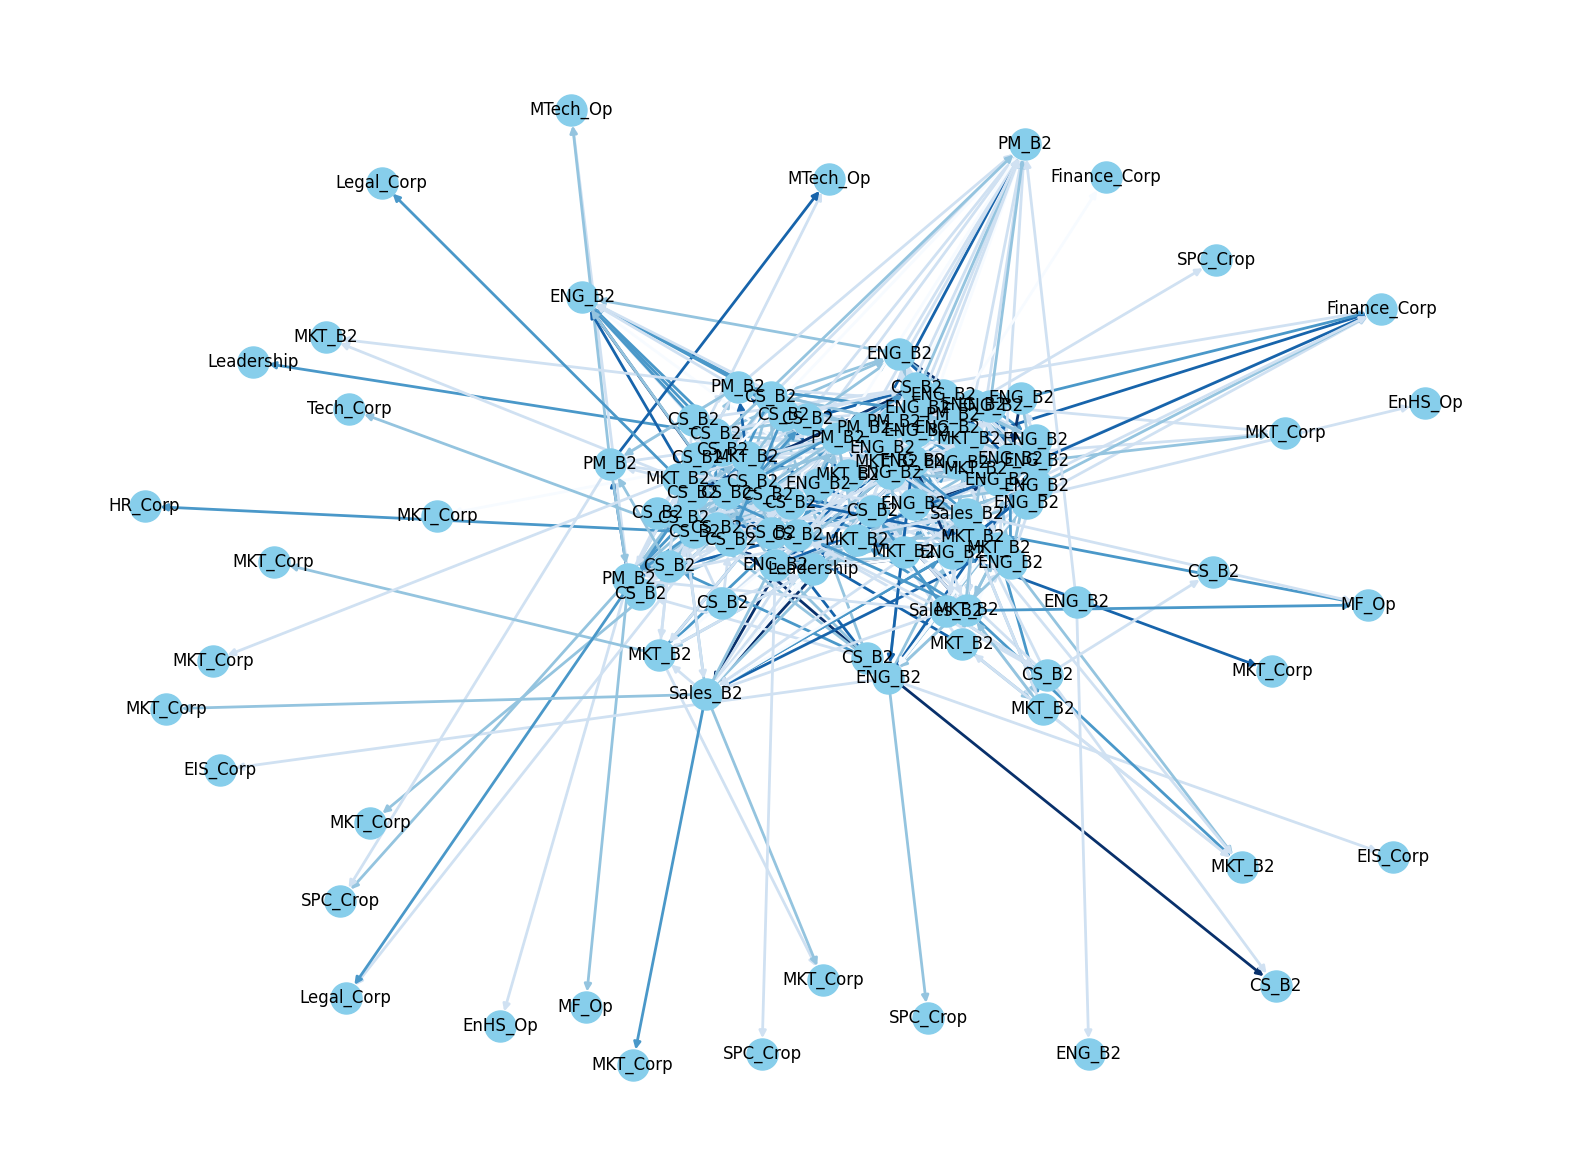

In [23]:
# plotting a network graph with abbreviation as label

abbr = nx.get_node_attributes(CG, "Abbr")
pos = nx.spring_layout(CG, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
nx.draw_networkx(CG, pos=pos, ax=ax, node_color='skyblue', node_size=500, labels = abbr,
                 edge_color=s_people['advice area count'], width=2.0, edge_cmap=plt.cm.Blues)

In [24]:
# creat hr information dataframe for each team

def subset1(level2):
    sub = hr_df[hr_df['Business Unit level 2'] == str(level2)]
    return sub


def subset(level1):
    sub = hr_df[hr_df['Business Unit level 1'] == str(level1)]
    return sub

lr = subset1('Leadership')
# specify Brand 2 vp as learder
slr = lr[lr['Employee ID'] == 3040598]
seng = subset1('Engineering - Brand 2')
smt = subset1('Marketing - Brand 2')
spm = subset1('Product Merchandising - Brand 2')
ssale = subset1('Sales - Brand 2')
scs = subset1('Customer Service - Brand 2')

opera = subset('Operations')
corp_1 = subset('Corporate')
# exclude brand 2 enginnering and vp form corporate

corp_2 = corp_1[corp_1['Business Unit level 2'] != 'Engineering - Brand 2']
corp = corp_2[corp_2['Employee ID'] != 3040598]


In [25]:
# number of people in each business unit level 2 in the organization

hr_df['Business Unit level 2'].value_counts()

Business Unit level 2
Customer Service - Brand 2         28
Engineering - Brand 2              27
Marketing - Brand 2                16
Marketing                           9
Product Merchandising - Brand 2     8
Supply Chain                        4
Sales - Brand 2                     3
Legal                               2
Leadership                          2
Manufacturing-Brand 1               2
Finance                             2
Environmental Health & Safety       2
Enterprise Information Systems      2
Manufacturing Technology            2
Human Resources                     1
Technology                          1
Name: count, dtype: int64

In [26]:
## create a dictionary that maps nodes to the community (business unit) they belong to

dic_1 = {}
for i in [seng, smt, spm, ssale, scs, slr]:
    for j in range(len(i)):
        dic_1[i['Employee ID'].iloc[j]] = i['Business Unit level 2'].iloc[j]
for i in [opera, corp]:
    for j in range(len(i)):
        dic_1[i['Employee ID'].iloc[j]] = i['Business Unit level 1'].iloc[j]
len(dic_1)

111

In [27]:
# create a dictionary that maps colors to the business unit

colors = ['tab:orange', 'tab:green', 'tab:red', 'tab:blue','darkred', 
          'yellow', 'tab:pink', 'tab:cyan']
nodeLegend = {}
keys = ['Engineering - Brand 2', 'Marketing - Brand 2',
        'Product Merchandising - Brand 2', 'Sales - Brand 2', 'Customer Service - Brand 2',
        'Leadership', 'Operations', 'Corporate']
for i in range(len(keys)):
    nodeLegend[keys[i]] = colors[i]


In [28]:
#create a dictionary that maps colors to each node based on which business unit the node belong to

node_color_1 = {node: nodeLegend[community_id] for node, community_id in dic_1.items()}

# Get the first 5 items
first_5_items = dict(list(node_color_1.items())[:5])

print(first_5_items)

{np.int64(3022906): 'tab:orange', np.int64(3023646): 'tab:orange', np.int64(3038672): 'tab:orange', np.int64(2002909): 'tab:orange', np.int64(3031524): 'tab:orange'}


In [29]:
# creat a list of nodes connection - who connect to whom

edges_l = []
for i in range(len(s_people)):

    v = s_people['Employee ID_recipient'].iloc[i]
    u = s_people['Employee ID_adviser'].iloc[i]
    w = s_people['advice area count'].iloc[i]
    t =(v, u, w)
    edges_l.append(t)

# Get the first 5 values
edges_l[:5]

[(np.int64(3029869), np.int64(2002956), np.int64(1)),
 (np.int64(2003137), np.int64(2003173), np.int64(4)),
 (np.int64(2003173), np.int64(3021660), np.int64(2)),
 (np.int64(3021784), np.int64(2002680), np.int64(3)),
 (np.int64(3044041), np.int64(2003115), np.int64(1))]

##### Organizational Network Graph - Connection among Individual Employee

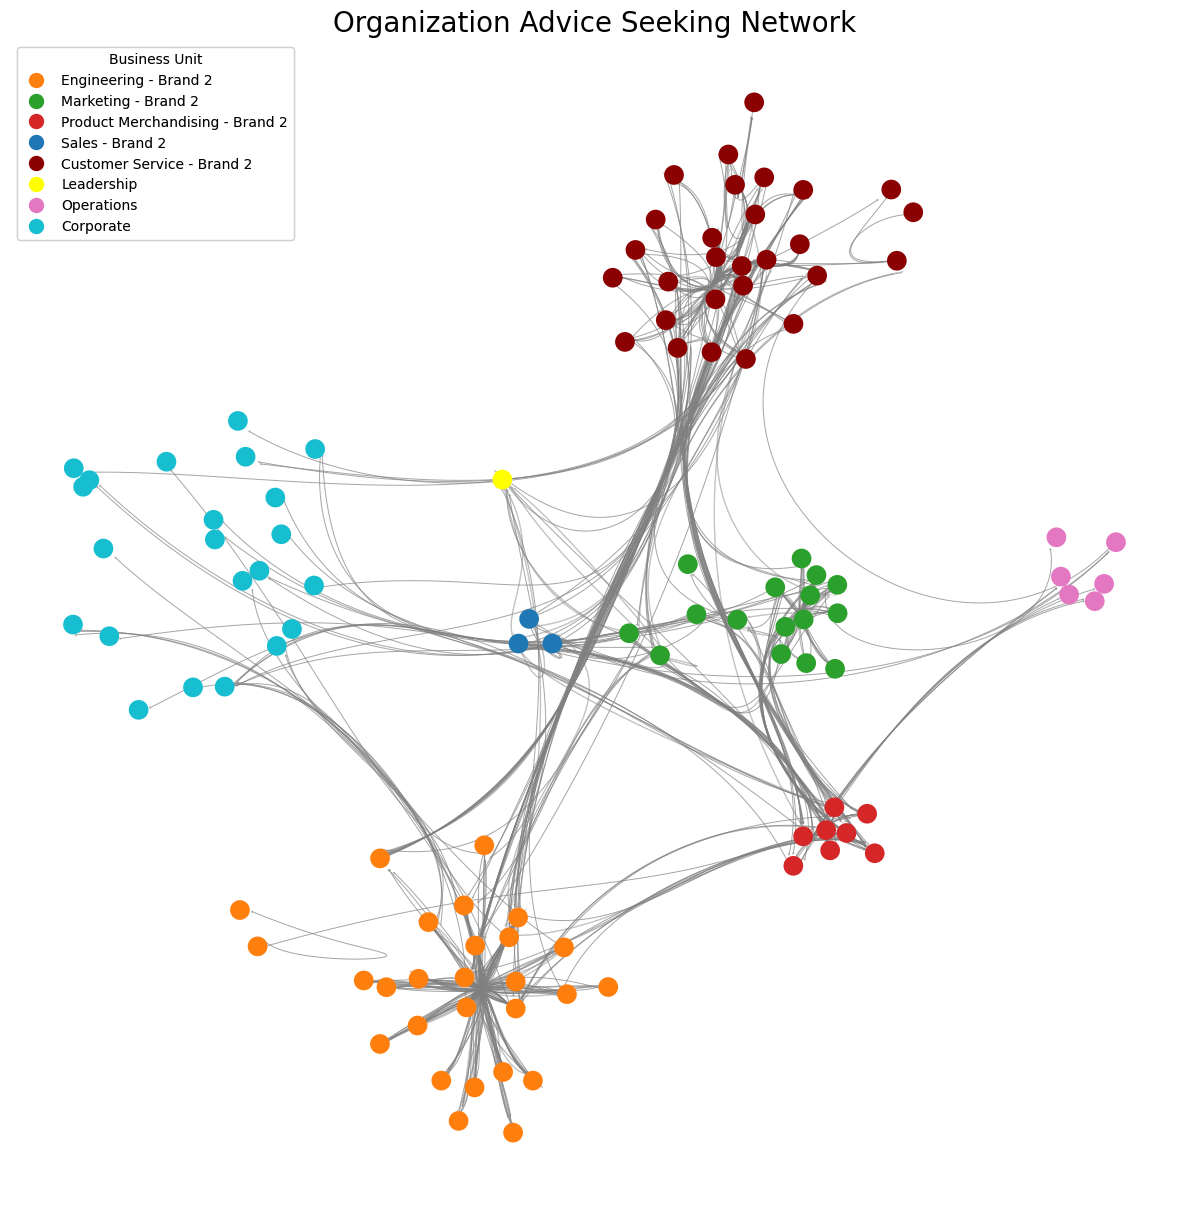

In [31]:
# set a random seed
np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(edges_l,
      node_color=node_color_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.1, arrows=True, node_size=1, edge_color='gray'
)

# Create proxy artists for legend handles.

node_proxy_artists = []
for node in keys:
    proxy = plt.Line2D(
        [], [],
        linestyle='None',
        color=nodeLegend[node],
        marker='o',
        markersize=10,
        label=node
    )
    node_proxy_artists.append(proxy)

node_legend = ax.legend(handles=node_proxy_artists, loc='upper left', 
                        title='Business Unit')
ax.add_artist(node_legend)
plt.title('Organization Advice Seeking Network', fontsize = 20)
plt.show()

##### Basic topological attributes

* Total number of nodes in network:
* Total number of edges:
* The average degree of a node:
* The average clustering coefficient:
* The average over all nodes:
* The graph’s density:

In [32]:
# define a funcstion that calculate the nasic toplogical attributes

def network_attribute (G):
    num_n = G.number_of_nodes()
    num_e = G.number_of_edges()
    avg_n = np.mean([d for _, d in G.degree()])
    shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
    average_path_lengths = [
        np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
        ]
    overall_avg = np.mean(average_path_lengths)
    den = nx.density(G)
    avg_clustering = nx.average_clustering(G)
    return [("Total number of nodes in network:", num_n),
            ("Total number of edges:", num_e), 
            ("The average degree of a node:", avg_n), 
            ("The average clustering coefficient:", avg_clustering),
            ("The average over all nodes:", overall_avg), 
            ("The graph’s density:", den),
            ]

In [33]:
toplogical_attr = network_attribute(CG)
toplogical_attr


[('Total number of nodes in network:', 111),
 ('Total number of edges:', 581),
 ('The average degree of a node:', np.float64(10.468468468468469)),
 ('The average clustering coefficient:', 0.2801934778205252),
 ('The average over all nodes:', np.float64(2.1306856562766585)),
 ('The graph’s density:', 0.047583947583947586)]

Conclustion:

* Total number of nodes in network: 111
* Total number of edges: 581
* On average, a node is connected to almost 10 other nodes, also known as neighbors of the node.
* The average of over all nodes value is 2.13 which represents the average of the shortest path length for all pairs of nodes: in order to reach from one node to another node, roughly 2.13 edges will be traversed on average.
* The graph’s density is 0.048. Clearly, the graph is a sparse one. A good number for density is between 0.40 and 0.60.
* The clustering coefficient is 0.28. It measures the degree to which nodes in a graph tend to cluster together. For instance, in a complete graph, the average clustering coefficient will be 1.0, indicating that every possible triangle is present. The reuslt shows a low average clustering coefficient, which indicates a low degree of clustering, meaning nodes are less likely to form tightly-knit groups.This implies limited collaboration and information silos in the organization.


##### Distribution of shortest path length in the network Graph

We would like to construct a visualization of the distribution of shortest path lengths.

Text(0, 0.5, 'Frequency (%)')

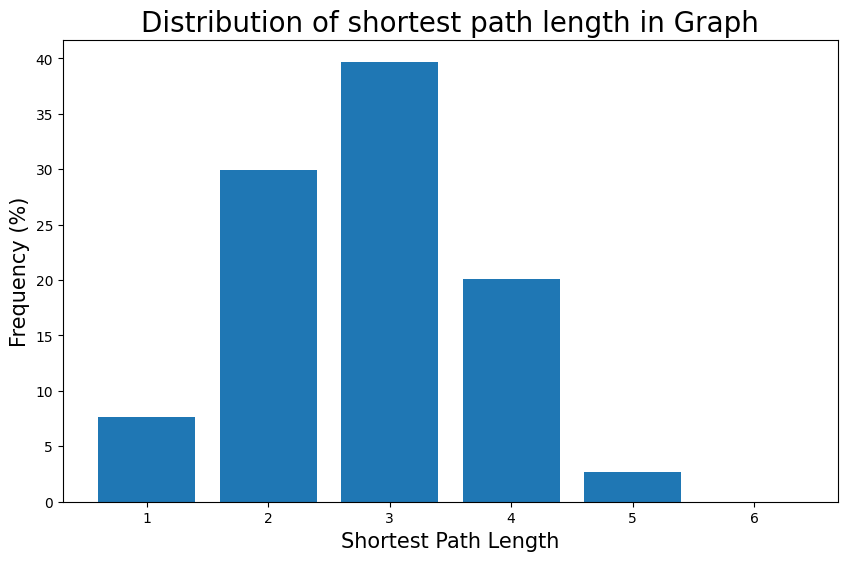

In [34]:
# We know the maximum shortest path length (the diameter), so create an array
# to store values from 0 up to (and including) diameter
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))
diameter = max(nx.eccentricity(G, sp=shortest_path_lengths).values())
path_lengths = np.zeros(diameter + 1, dtype=int)

# Extract the frequency of shortest path lengths between two nodes
for pls in shortest_path_lengths.values():
    pl, cnts = np.unique(list(pls.values()), return_counts=True)
    path_lengths[pl] += cnts

# Express frequency distribution as a percentage (ignoring path lengths of 0)
freq_percent = 100 * path_lengths[1:] / path_lengths[1:].sum()

# Plot the frequency distribution (ignoring path lengths of 0) as a percentage
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(np.arange(1, diameter + 1), height=freq_percent)
ax.set_title(
    "Distribution of shortest path length in Graph", fontdict={"size": 20}, loc="center"
)
ax.set_xlabel("Shortest Path Length", fontdict={"size": 15})
ax.set_ylabel("Frequency (%)", fontdict={"size": 15})

Conclusion:

The majority of the shortest path lengths are from 2.5 to 4.5 edges long. Also, it’s highly unlikely for a pair of nodes to have a shortest path of length 5 (diameter length) as the likelihood is less than 2.5%.

##### Centrality Measurements: focused on individual in the SpoonFlower

In this section, we will survey a number of methods of measuring “centrality” in order to answer following questions:

* Who is more important in the network in terms of number of connections (edges)? - Deegren Centrality
* Who will be a good source of secondhand informations? - Closeness Centrality
* Who play roles as community bridges for allowing information to pass from one part of the newtork to the other. - Betweenness Centrality
* Who is the most influential people within the organization? - Eiganvector Centrality & PageRank

###### Degree centrality - Important nodes based on the number of degrees a node has.

In [35]:
# finding the nodes with the highest degree centralities. 
# Specifically, the nodes with the 5 highest degree centralities

degree_centrality = nx.centrality.degree_centrality(CG)  

# save results in a variable to use again
# top 5 nodes
dc_5 = (sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

# bottom 5 nodes
dc_e5 = (sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[-5:]
degcent_df = pd.DataFrame(degree_centrality, index=[0]).T
degcent_df.columns = ['degree_centrality']
degcent_df.sort_values('degree_centrality', inplace=True, ascending=False)

degcent = degcent_df.reset_index()
degcent = degcent.rename(columns={'index':'Employee ID'})
degcent.head()

Employee ID  degree_centrality
0      2002605           0.300000
1      2003173           0.290909
2      2002394           0.290909
3      3021660           0.245455
4      3020739           0.227273

In [49]:
# define a function that generate colors

def color_map_color(value, cmap_name='jet', vmin=0, vmax=0.23):
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  
    # will return rgba, we take only first 3 so we get rgb
    rgb = cmap(norm(abs(value)))  
    color = matplotlib.colors.rgb2hex(rgb)
    return color

In [50]:

nodeLegend_1 = {}

for i in range(len(degcent)):
    value = degcent['degree_centrality'].iloc[i]
    nodeLegend_1[degcent['Employee ID'].iloc[i]] = color_map_color(value)


C:\Users\jovis\AppData\Local\Temp\ipykernel_14868\2696568201.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


In [45]:
# extrect brand 2 employees data from hr DataFrame

in_sf = hr_df[hr_df['Business Unit level 2'].isin(['Engineering - Brand 2','Marketing - Brand 2', 
                                                   'Product Merchandising - Brand 2',
                                                   'Customer Service - Brand 2',
                                                   'Sales - Brand 2'])]

# create a employee id list for brand 2 organization
b2_id = list(in_sf['Employee ID'])

In [229]:
# all employee id in the whole network

# hr_em = list(hr_df['Employee ID'])

# # brand 2 managers' id
# mg = [3021660, 2003036, 2003148, 3042370, 2003155, 2003173]
# node_shape ={}
# for i in range(len(hr_df)):#hr_em:
#     # specify vp's employee id
#     #'so^>v<dph8'
#     if hr_df['Employee ID'].iloc[i] == 3040598:
#         node_shape[hr_df['Employee ID'].iloc[i]] = 'p'
#     elif hr_df['Business Unit level 2'].iloc[i] == 'Engineering - Brand 2': #i in mg:
#         node_shape[hr_df['Employee ID'].iloc[i]] = 'v'
#     elif hr_df['Business Unit level 2'].iloc[i] == 'Customer Service - Brand 2':
#         node_shape[hr_df['Employee ID'].iloc[i]] = 'd'
#     elif hr_df['Business Unit level 2'].iloc[i] == 'Product Merchandising - Brand 2': 
#         node_shape[hr_df['Employee ID'].iloc[i]] = '^'
#     elif hr_df['Business Unit level 2'].iloc[i] == 'Marketing - Brand 2': 
#         node_shape[hr_df['Employee ID'].iloc[i]] = 'h'
#     elif hr_df['Business Unit level 2'].iloc[i] == 'Sales - Brand 2':
#         node_shape[hr_df['Employee ID'].iloc[i]] = 's'
#     else:
#         node_shape[hr_df['Employee ID'].iloc[i]] = 'o'
# node_size = {}
# for i in hr_em:
#     if i == 3040598:
#         node_size[i] = 2
#     elif i in mg:
#         node_size[i] = 1.5
#     elif i in b2_id and i not in mg:
#         node_size[i] = 1
#     else:
#         node_size[i] = 0.5

In [54]:
hr_em = list(hr_df['Employee ID'])
mg = [3021660, 2003036, 2003148, 3042370, 2003155, 2003173]
node_shape ={}
for i in hr_em:
    if i == 3040598:
        node_shape[i] = 'd'
    elif i in mg:
        node_shape[i] = 'v'
    else:
        node_shape[i] = 'o'
node_size = {}
for i in hr_em:
    if i == 3040598:
        node_size[i] = 2
    elif i in mg:
        node_size[i] = 1.5
    elif i in b2_id and i not in mg:
        node_size[i] = 1
    else:
        node_size[i] = 0.5

In [52]:
# create a dic that map top 5 degree centraility people's position title with thier employee id

subnodelist = list(degcent['Employee ID'][:5]) #+ list(degcent['Employee ID'][-5:])
hr_id = hr_df[hr_df['Employee ID'].isin(subnodelist)].reset_index(drop=True)

t_label = {}
for i in range(len(hr_df)):
    if hr_df['Employee ID'].iloc[i] in list(hr_id['Employee ID']):
        t_label[hr_df['Employee ID'].iloc[i]] = hr_df['Position Title'].iloc[i]
    else:
        t_label[hr_df['Employee ID'].iloc[i]] = ""

##### Netwrok Graph with Color Coding of Degree Centrality Value

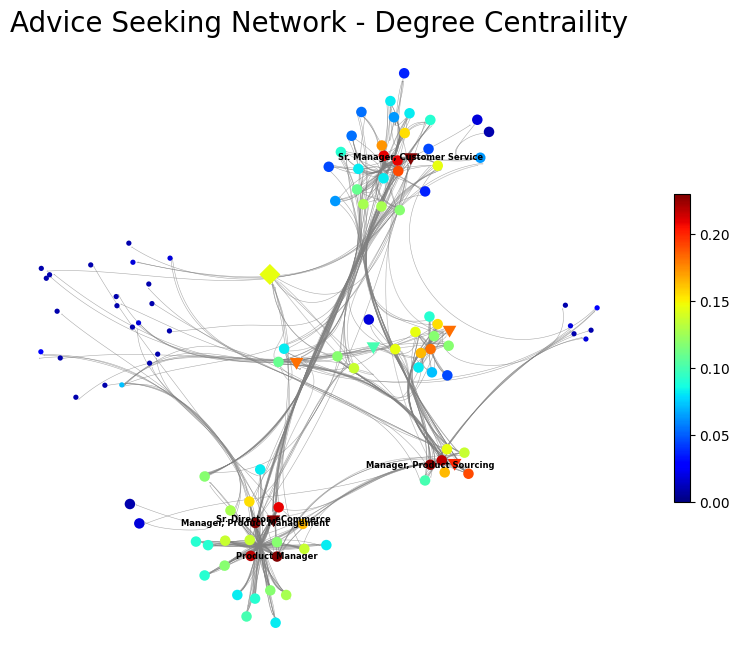

In [55]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=(12, 8))
ax.axis("off")
Graph(edges_l,
      node_color=nodeLegend_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.1, arrows=True,  edge_color='gray',
      node_size=node_size, node_shape = node_shape,
      node_labels=t_label, node_label_fontdict=dict(size=6, fontweight='bold')
)

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 0.23), cmap='jet'), 
             ax=ax, orientation='vertical', shrink=0.5)
plt.title('Advice Seeking Network - Degree Centraility', fontsize = 20)
plt.show()

Text(0, 0.5, 'Counts')

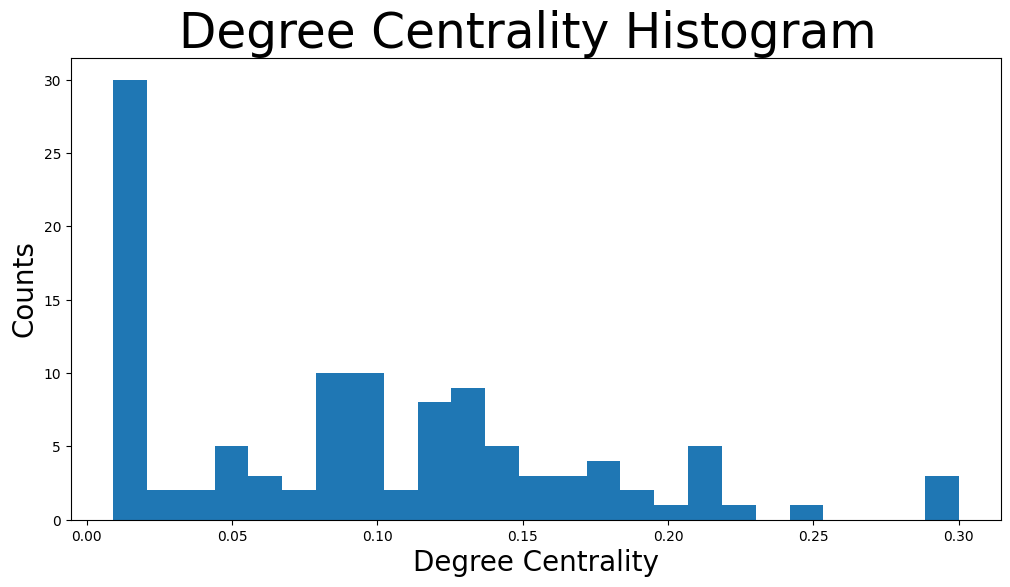

In [56]:
#the distribution of degree centralities

plt.figure(figsize=(12, 6))
plt.hist(degree_centrality.values(), bins=25)
plt.title("Degree Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Degree Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In an organization with 111 employees, typical degree centrality values can vary based on the network's structure and the relationships between employees. Here are general insights:

1. **Range**: Degree centrality values typically range from 0 to 1. A value closer to 1 indicates that the employee has many direct connections to other employees.

2. **High Degree Centrality**: Employees with high degree centrality are well-connected and may indicates these employees play central roles in communication and collaboration within the organization. In a network of this size (111), high degree centrality values might be in the range of 0.1 to 0.2, depending on the density of connections.

3. **Low Degree Centrality**: Employees with low degree centrality have fewer direct connections. These values are typically closer to 0, indicating more isolated or specialized roles.



##### Closeness centrality - Looing for nodes that are closest to all other nodes (a good source for the secondhand informations).

In [57]:
# The nodes with the highest closeness centralities

closeness_centrality = nx.centrality.closeness_centrality(CG)  

# save results in a variable to use again
cnc_5 = (sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[:5]
cnc_e5 = (sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))[-5:]
closecent_df = pd.DataFrame(closeness_centrality, index=[0]).T
closecent_df.columns = ['closeness_centrality']
closecent_df.sort_values('closeness_centrality', inplace=True, ascending=False)
closecent = closecent_df.reset_index()
closecent = closecent.rename(columns={'index':'Employee ID'})
closecent

Employee ID  closeness_centrality
0        2003018              0.377763
1        2002605              0.366043
2        2003173              0.360738
3        3021660              0.348125
4        2002394              0.325371
..           ...                   ...
106      3031823              0.000000
107      3004874              0.000000
108      2002252              0.000000
109      2000237              0.000000
110      2002435              0.000000

[111 rows x 2 columns]

Text(0, 0.5, 'Counts')

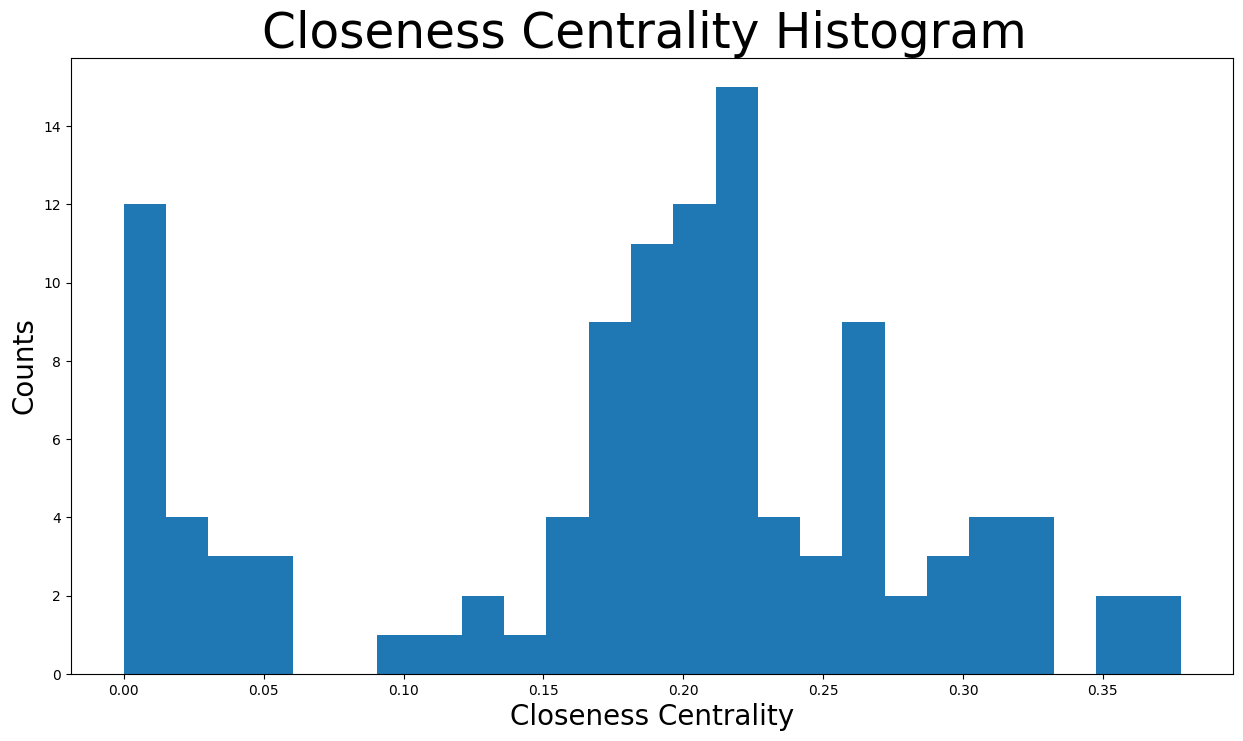

In [58]:
# the distribution of the closeness centralities:

plt.figure(figsize=(15, 8))
plt.hist(closeness_centrality.values(), bins=25)
plt.title("Closeness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Closeness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In an organization with 111 employees, typical high and low closeness centrality values can vary based on the network's structure and the relationships between employees. Here are some general insights:

1. **High Closeness Centrality Values**:
   - Employees with high closeness centrality are central to the network, meaning they can communicate and disseminate information rapidly across the organization. In a network of this size, high closeness centrality values might be in the range of 0.5 to 1.
   - **Range**: High closeness centrality values are typically closer to 1. These values indicate that the employee can reach other employees quickly and efficiently⁴.
   - **Interpretation**: Employees with high closeness centrality are central to the network, meaning they can communicate and disseminate information rapidly across the organization.

2. **Low Closeness Centrality Values**:
   - **Range**: Low closeness centrality values are closer to 0. These values indicate that the employee is more peripheral and takes longer to reach other employees.
   - **Interpretation**: Employees with low closeness centrality are less central in terms of communication and information flow. They might be more isolated or specialized in their roles.



In [59]:
def color_map_close(value, cmap_name='jet', vmin=0, vmax=0.28):
    
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  
    rgb = cmap(norm(abs(value)))  
    color = matplotlib.colors.rgb2hex(rgb)
    return color

In [60]:
nodeLegend_close = {}

for i in range(len(closecent)):
    value = closecent['closeness_centrality'].iloc[i]
    nodeLegend_close[closecent['Employee ID'].iloc[i]] = color_map_close(value)


C:\Users\jovis\AppData\Local\Temp\ipykernel_14868\794225943.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


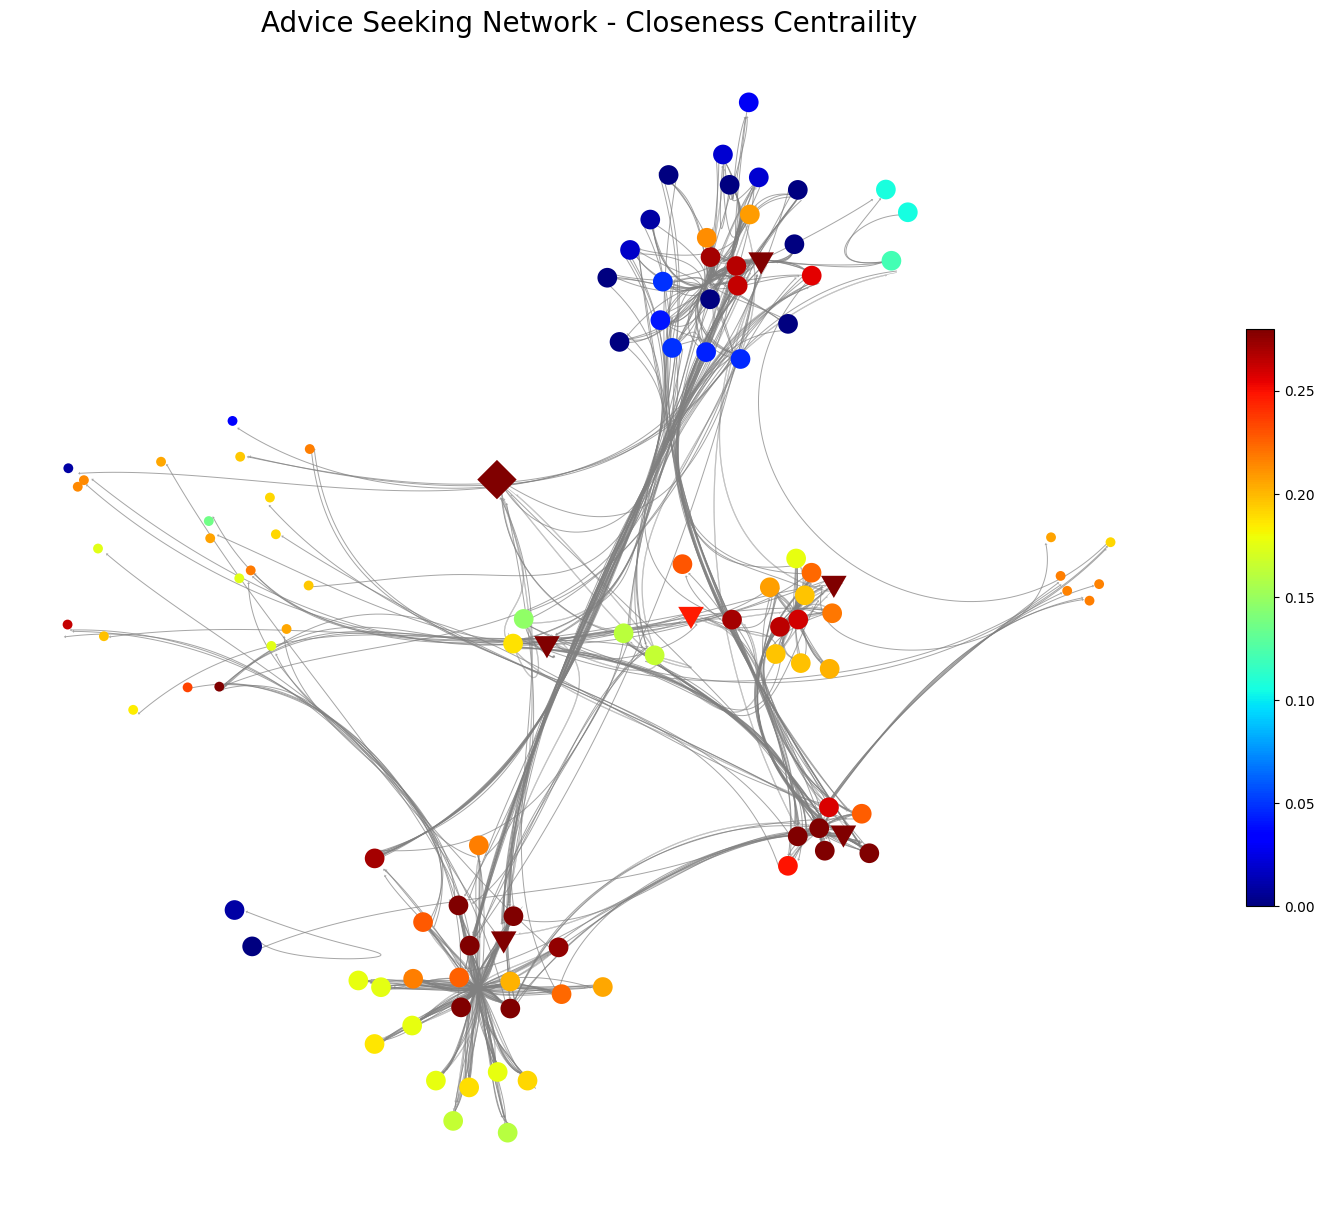

In [62]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(edges_l,
      node_color=nodeLegend_close, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.1, arrows=True,  edge_color='gray',
      node_size=node_size, node_shape = node_shape
)

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 0.28), cmap='jet'),
             ax=ax, orientation='vertical', shrink=0.5)
plt.title('Advice Seeking Network - Closeness Centraility', fontsize = 20)
plt.show()

#### Betweenness Centrality - Finding people aho is the critical role that allows information to pass bwtween teams.

In [63]:
#The highest betweenness centralities will be calculated and shown with their centrality values:

betweenness_centrality = nx.centrality.betweenness_centrality(CG)  

# save results in a variable to use again
bc_5 = (sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[:5]
bc_e5 = (sorted(betweenness_centrality.items(), key=lambda item: item[1], reverse=True))[-5:]
betwcent_df = pd.DataFrame(betweenness_centrality, index=[0]).T
betwcent_df.columns = ['betweenness_centrality']
betwcent_df.sort_values('betweenness_centrality', inplace=True, ascending=False)
betwcent = betwcent_df.reset_index()
betwcent = betwcent.rename(columns={'index':'Employee ID'})
betwcent

Employee ID  betweenness_centrality
0        2003173                0.133318
1        2002605                0.074544
2        3021660                0.060947
3        2003209                0.053728
4        2003148                0.053505
..           ...                     ...
106      2003157                0.000000
107      2001289                0.000000
108      2003198                0.000000
109      2002599                0.000000
110      3028421                0.000000

[111 rows x 2 columns]

Text(0, 0.5, 'Counts')

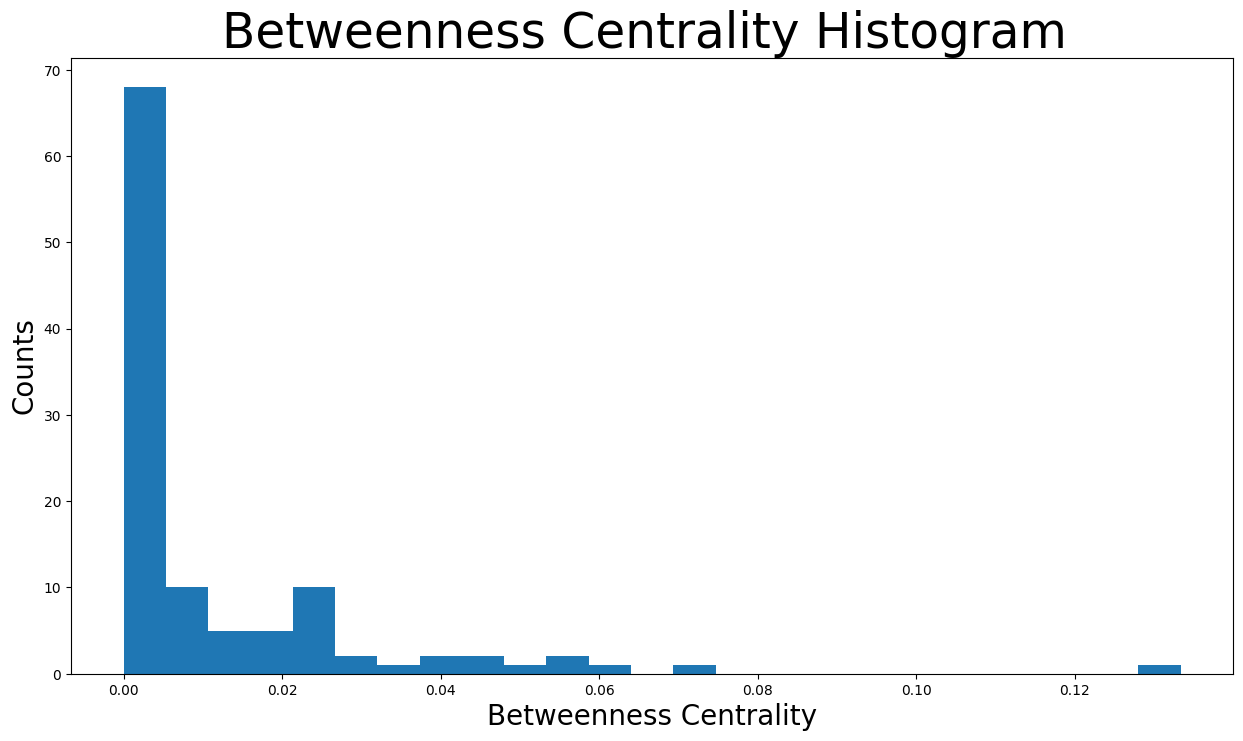

In [64]:
# the distribution of betweenness centralities

plt.figure(figsize=(15, 8))
plt.hist(betweenness_centrality.values(), bins=25)
plt.title("Betweenness Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Betweenness Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In an organization with 111 employees, typical high and low betweenness centrality values can vary based on the network’s structure and the roles of individuals within it. Here are some general insights:

1. High Betweenness Centrality Values:

* Range: High betweenness centrality values can vary widely, but in a network of this size, values might range from around 0.1 to higher values depending on the network’s complexity.
* Interpretation: Employees with high betweenness centrality are crucial for connecting different parts of the organization. They often act as bridges or brokers, facilitating communication and information flow across the network.

2. Low Betweenness Centrality Values:

* Range: Low betweenness centrality values are typically close to 0. These values indicate that the employee does not frequently act as a bridge between other employees.
* Interpretation: Employees with low betweenness centrality are less central in terms of connecting different parts of the network. They might be more peripheral or specialized in their roles.

In [65]:
def color_map_bw(value, cmap_name='jet', vmin=0, vmax=0.11):
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name) 
    rgb = cmap(norm(abs(value)))  
    color = matplotlib.colors.rgb2hex(rgb)
    return color

In [66]:
nodeLegend_bw = {}

for i in range(len(betwcent)):
    value = betwcent['betweenness_centrality'].iloc[i]
    nodeLegend_bw[betwcent['Employee ID'].iloc[i]] = color_map_bw(value)


C:\Users\jovis\AppData\Local\Temp\ipykernel_14868\1589966290.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Corporate. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Operations. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_edge_layout.py:978: RuntimeWarning: invalid value encountered in divide
  displacement = compatibility * delta / distance_squared[..., None]


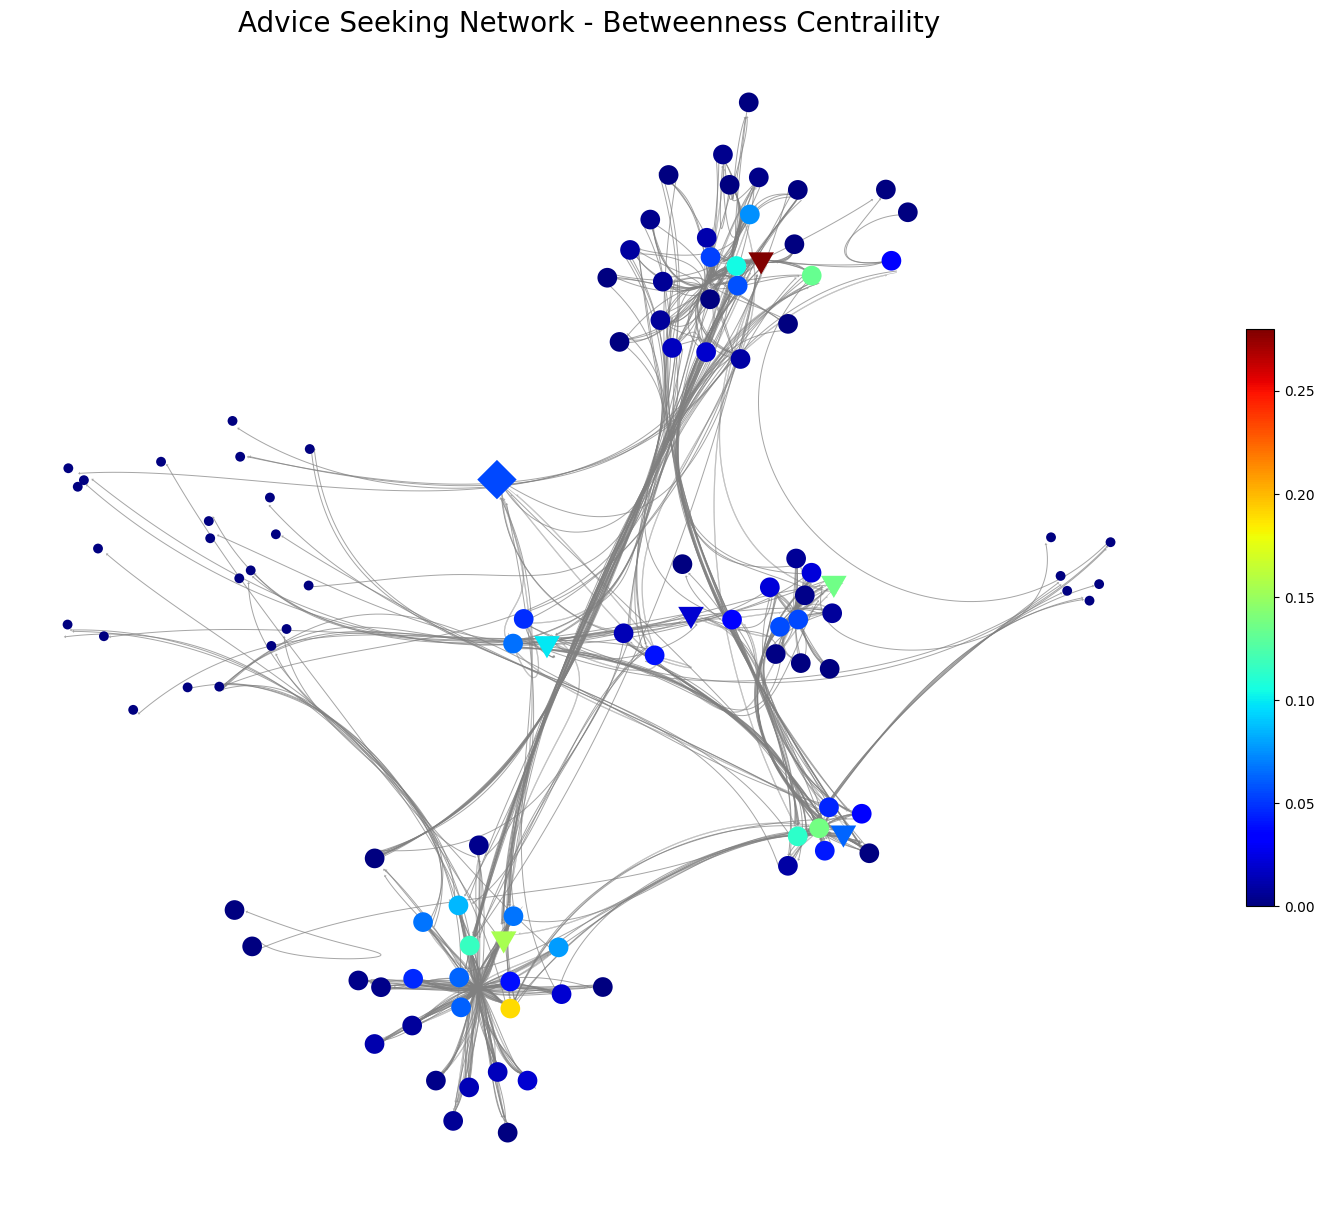

In [67]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(edges_l,
      node_color=nodeLegend_bw, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.1, arrows=True,  edge_color='gray',
      node_size=node_size, node_shape = node_shape
)

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 0.28), cmap='jet'),
             ax=ax, orientation='vertical', shrink=0.5)
plt.title('Advice Seeking Network - Betweenness Centraility', fontsize = 20)
plt.show()

#### Eigenvector Centrality - identifying the nodes with the most influence over the whole network.

In [68]:
eigenvector_centrality = nx.centrality.eigenvector_centrality(CG)  

# save results in a variable to use again
eigc_5 = (sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[:5]
eigc_e5 = (sorted(eigenvector_centrality.items(), key=lambda item: item[1], reverse=True))[-5:]
eigencent_df = pd.DataFrame(eigenvector_centrality, index=[0]).T
eigencent_df.columns = ['eigenvector_centrality']
eigencent_df.sort_values('eigenvector_centrality', inplace=True, ascending=False)
eigencent = eigencent_df.reset_index()
eigencent = eigencent.rename(columns={'index':'Employee ID'})
eigencent.head()


Employee ID  eigenvector_centrality
0      2002605                0.322480
1      2003018                0.310230
2      3021660                0.295186
3      2003155                0.266531
4      2003209                0.256522

In [69]:
def color_map_eigen(value, cmap_name='jet', vmin=0, vmax=0.41):
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  
    rgb = cmap(norm(abs(value))) 
    color = matplotlib.colors.rgb2hex(rgb)
    return color

In [70]:
nodeLegend_eigen = {}

for i in range(len(eigencent)):
    value = eigencent['eigenvector_centrality'].iloc[i]
    nodeLegend_eigen[eigencent['Employee ID'].iloc[i]] = color_map_eigen(value)


C:\Users\jovis\AppData\Local\Temp\ipykernel_14868\1156430877.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Corporate. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Operations. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_edge_layout.py:978: RuntimeWarning: invalid value encountered in divide
  displacement = compatibility * delta / distance_squared[..., None]


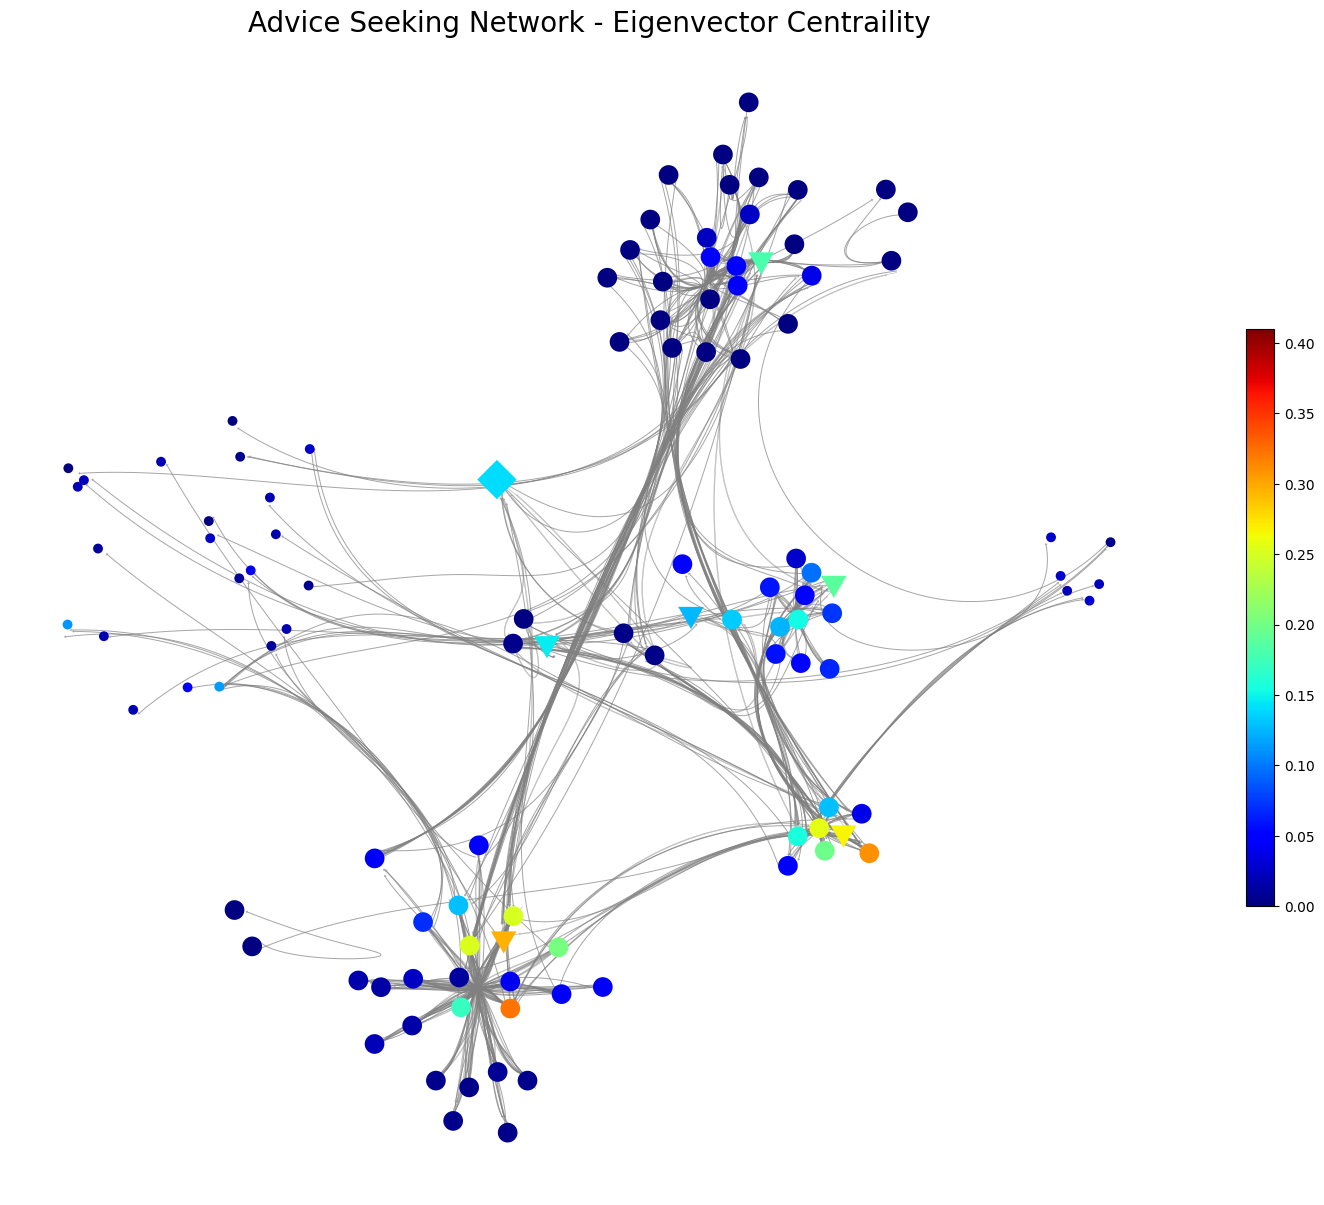

In [71]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(edges_l,
      node_color=nodeLegend_eigen, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.1, arrows=True,  edge_color='gray',
      node_size=node_size, node_shape = node_shape
)

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 0.41), cmap='jet'),
             ax=ax, orientation='vertical', shrink=0.5)
plt.title('Advice Seeking Network - Eigenvector Centraility', fontsize = 20)
plt.show()

Text(0, 0.5, 'Counts')

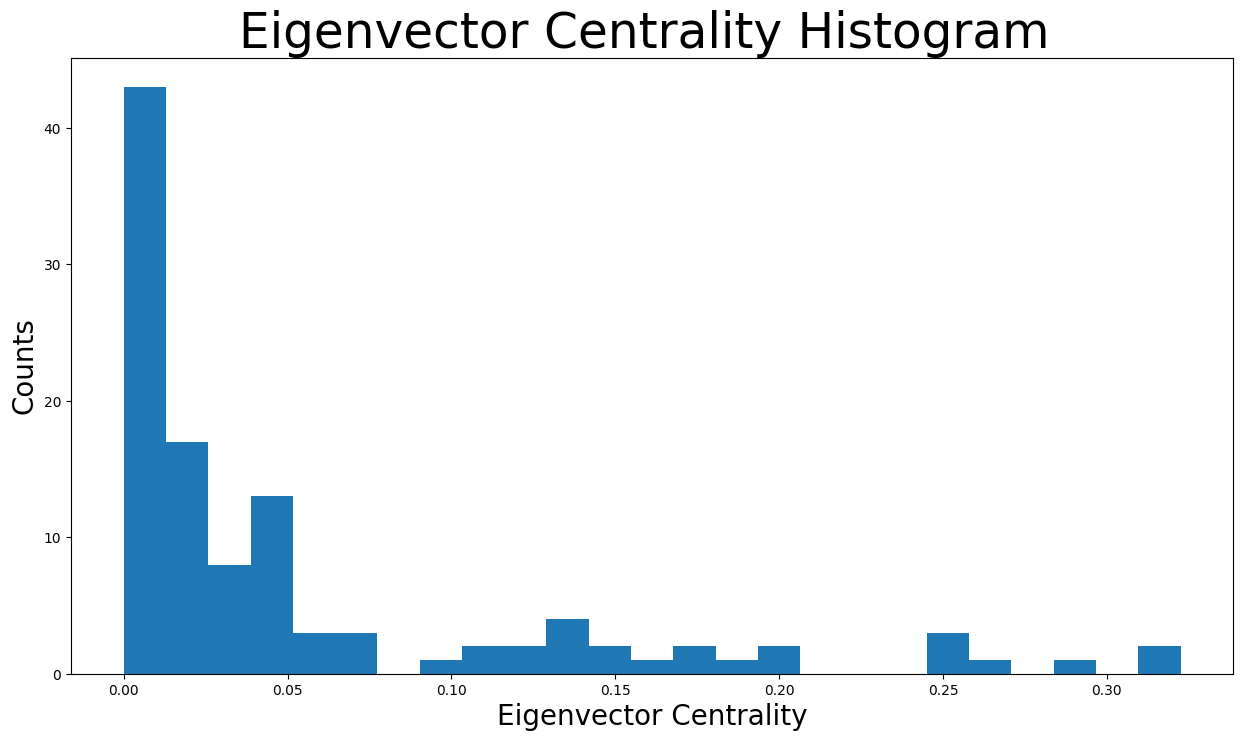

In [72]:
# the distribution of eigenvector centrality

plt.figure(figsize=(15, 8))
plt.hist(eigenvector_centrality.values(), bins=25)
plt.title("Eigenvector Centrality Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Eigenvector Centrality", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In an organization with 111 employees, the typical high and low eigenvector centrality values can vary based on the network's structure and the relationships between employees. Here are some general insights:

1. **High Eigenvector Centrality Values**:
   - **Range**: High eigenvector centrality values are typically closer to 1. In a well-connected network, these values might range from 0.7 to 1.
   - **Interpretation**: Employees with high eigenvector centrality are highly influential and well-connected to other influential employees. These are often key individuals such as managers or central figures in the organization⁵.

2. **Low Eigenvector Centrality Values**:
   - **Range**: Low eigenvector centrality values are closer to 0. In a typical organizational network, these values might range from 0 to 0.3.
   - **Interpretation**: Employees with low eigenvector centrality have fewer connections to influential employees. These individuals might be on the periphery of the network or in less central roles.

#### PageRank Centrality - measuring the importance of webpages based on the quality and quantity of links pointing to them

In [73]:
pagerank = nx.pagerank(CG, alpha=0.85, max_iter=100)

# save results in a variable to use again
pgr_5 = (sorted(pagerank.items(), key=lambda item: item[1], reverse=True))[:5]
pgr_e5 = (sorted(pagerank.items(), key=lambda item: item[1], reverse=True))[-5:]
pagerank_df = pd.DataFrame(pagerank, index=[0]).T
pagerank_df.columns = ['pagerank']
pagerank_df.sort_values('pagerank', inplace=True, ascending=False)
prank = pagerank_df.reset_index()
prank = prank.rename(columns={'index':'Employee ID'})
prank

Employee ID  pagerank
0        2002605  0.035423
1        2002394  0.030993
2        2003018  0.029917
3        3021660  0.028866
4        2003173  0.028705
..           ...       ...
106      3031823  0.002976
107      3004874  0.002976
108      2002252  0.002976
109      2000237  0.002976
110      2002435  0.002976

[111 rows x 2 columns]

Text(0, 0.5, 'Counts')

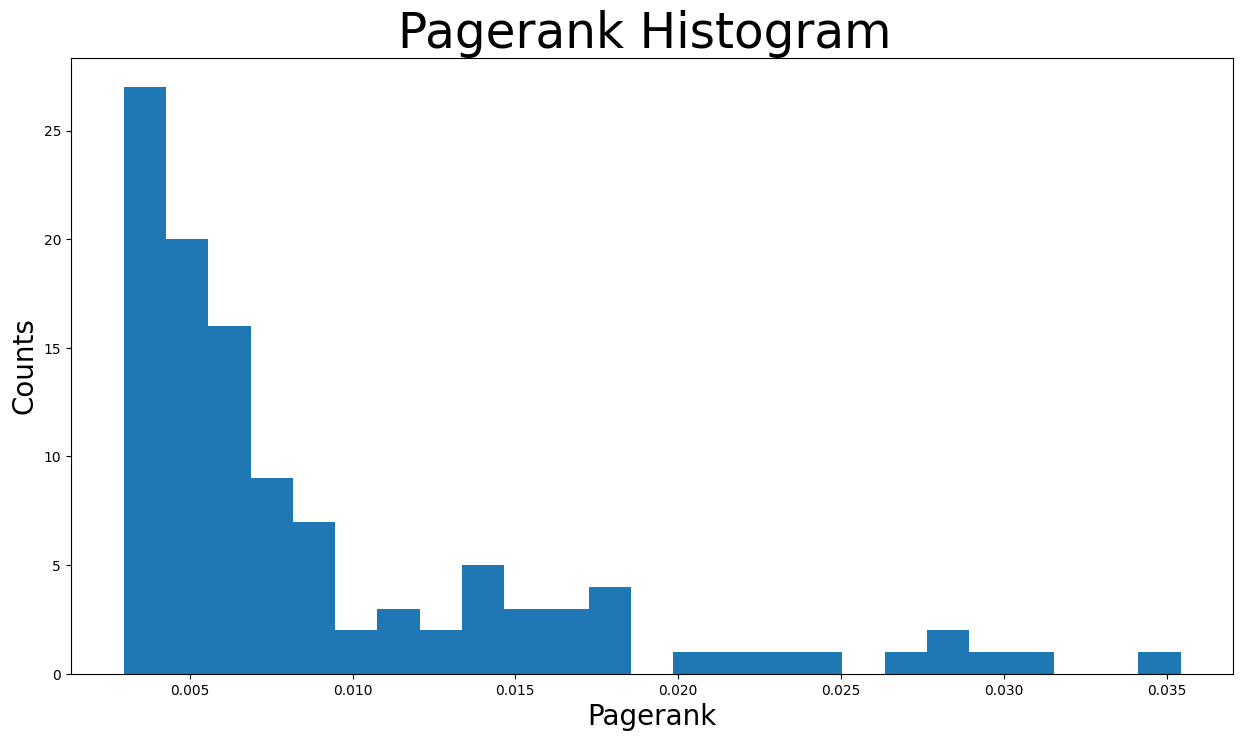

In [74]:
# the distribution of pagerank

plt.figure(figsize=(15, 8))
plt.hist(pagerank.values(), bins=25)
plt.title("Pagerank Histogram ", fontdict={"size": 35}, loc="center")
plt.xlabel("Pagerank", fontdict={"size": 20})
plt.ylabel("Counts", fontdict={"size": 20})

In [75]:
# a function for generating colors

def color_map_pg(value, cmap_name='jet', vmin=0, vmax=0.031):
    norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)
    cmap = cm.get_cmap(cmap_name)  
    rgb = cmap(norm(abs(value))) 
    color = matplotlib.colors.rgb2hex(rgb)
    return color

In [76]:
nodeLegend_pg = {}

for i in range(len(prank)):
    value = prank['pagerank'].iloc[i]
    nodeLegend_pg[prank['Employee ID'].iloc[i]] = color_map_pg(value)


C:\Users\jovis\AppData\Local\Temp\ipykernel_14868\1145723317.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap_name)


c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Corporate. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Operations. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_edge_layout.py:978: RuntimeWarning: invalid value encountered in divide
  displacement = compatibility * delta / distance_squared[..., None]


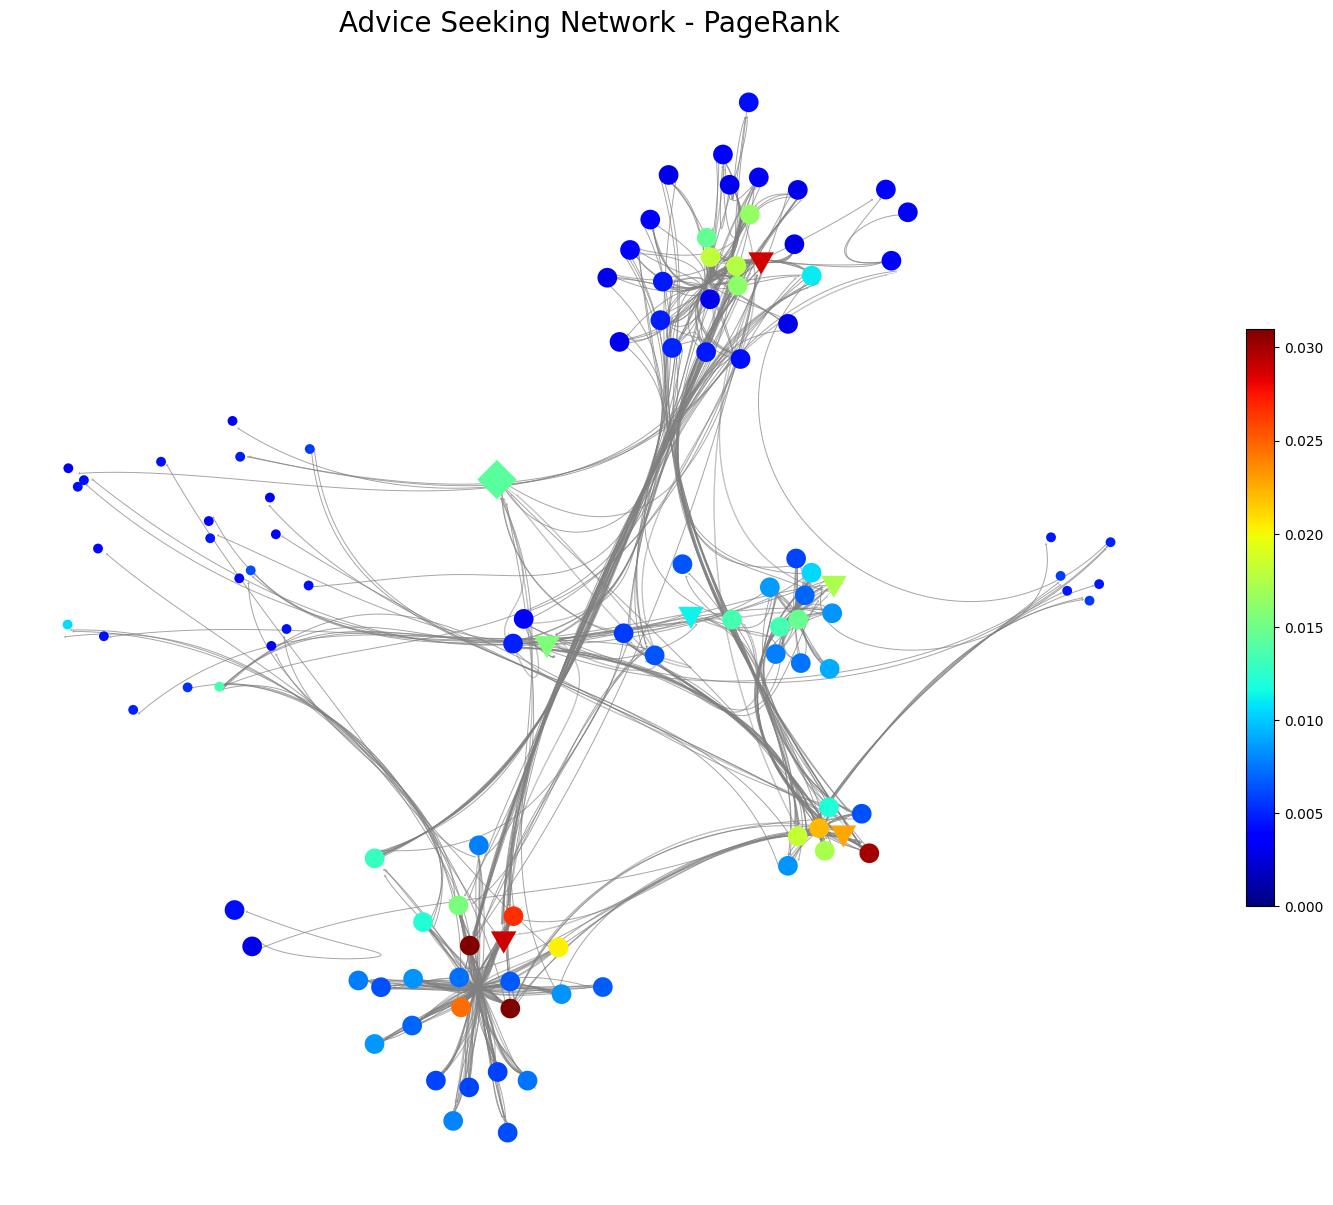

In [77]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(edges_l,
      node_color=nodeLegend_pg, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.1, arrows=True,  edge_color='gray',
      node_size=node_size, node_shape = node_shape
)

fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(0, 0.031), cmap='jet'),
             ax=ax, orientation='vertical', shrink=0.5)
plt.title('Advice Seeking Network - PageRank', fontsize = 20)
plt.show()

In [81]:
#creating a dataframe for top 5 person's position title in each centrality measures

top_5_cent = pd.DataFrame()
top_5_cent['Order'] = range(1, 6)


def title_top5(df):
    de_p =[]
    for i in df['Employee ID'][:5]:
        data = hr_df[hr_df['Employee ID'] == i].iloc[0]['Position Title']
        de_p.append(data)
    return de_p

top_5_cent['Degree Centrality'] = title_top5(degcent)
top_5_cent['Closeness Centrality'] = title_top5(closecent)
top_5_cent['Betweenness Centrality'] = title_top5(betwcent)
top_5_cent['Eigenvector Centrality'] = title_top5(eigencent)

top_5_cent


Order              Degree Centrality           Closeness Centrality  \
0      1                Product Manager     Sr. Manager, Merchandising   
1      2  Sr. Manager, Customer Service                Product Manager   
2      3    Manager, Product Management  Sr. Manager, Customer Service   
3      4        Sr. Director, eCommerce        Sr. Director, eCommerce   
4      5      Manager, Product Sourcing    Manager, Product Management   

          Betweenness Centrality      Eigenvector Centrality  
0  Sr. Manager, Customer Service             Product Manager  
1                Product Manager  Sr. Manager, Merchandising  
2        Sr. Director, eCommerce     Sr. Director, eCommerce  
3         Manager, Merchandising     Director, Business Line  
4        Sr. Director, Marketing      Manager, Merchandising

In [86]:
top_5_cent.columns
cens = top_5_cent[['Order', 'Degree Centrality', 'Closeness Centrality',
       'Betweenness Centrality', 'Eigenvector Centrality']]
list(cens[cens['Order'] == 5].values)

[array([5, 'Manager, Product Sourcing', 'Manager, Product Management',
        'Sr. Director, Marketing', 'Manager, Merchandising'], dtype=object)]

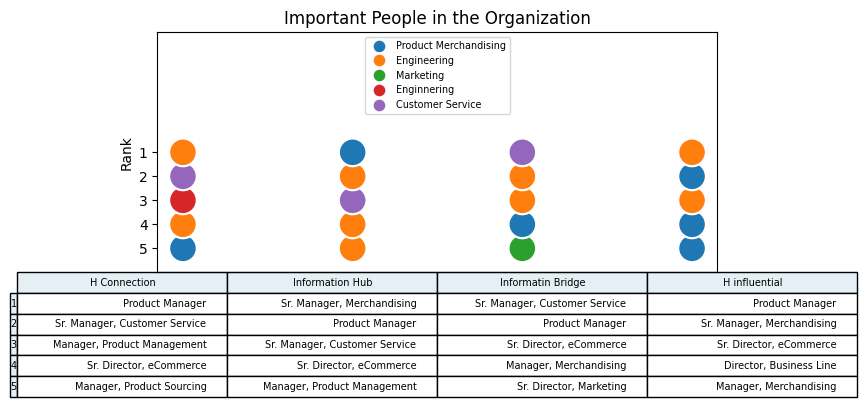

In [87]:

# creat data, rows and columns for dot plot
data =  [
        'Product Merchandising','Engineering', 
        'Marketing','Product Merchandising',
        'Engineering', 'Engineering',
        'Product Merchandising', 'Product Merchandising',
        'Enginnering', 'Customer Service',
        'Engineering', 'Engineering',
        'Customer Service', 'Engineering',
        'Engineering', 'Product Merchandising',
        'Engineering','Product Merchandising', 
        'Customer Service','Engineering']

columns = ['H Connection', 'Information Hub', 'Informatin Bridge', 'H influential',
     'H Connection', 'Information Hub', 'Informatin Bridge', 'H influential',
     'H Connection', 'Information Hub', 'Informatin Bridge', 'H influential',
     'H Connection', 'Information Hub', 'Informatin Bridge', 'H influential',
     'H Connection', 'Information Hub', 'Informatin Bridge', 'H influential']
rows = [1, 1, 1, 1, 
     2, 2, 2, 2, 
     3, 3, 3, 3, 
     4, 4, 4, 4,  
     5, 5, 5, 5, ]
# create a dataframe

data_list = pd.DataFrame(
    {'Centrality': columns,
     'Rank': rows,
     'Team category': data
    })



# scatter plot
plt.figure(figsize = (8, 5))
sns.scatterplot(data=data_list,x="Centrality", y="Rank", hue="Team category", s=400)

# Plot bars and create text labels for the table
cell_text = [['Product Manager', 'Sr. Manager, Merchandising',
        'Sr. Manager, Customer Service', 'Product Manager'],
         ['Sr. Manager, Customer Service', 'Product Manager',
        'Product Manager', 'Sr. Manager, Merchandising'],
         ['Manager, Product Management', 'Sr. Manager, Customer Service',
        'Sr. Director, eCommerce', 'Sr. Director, eCommerce'],
         ['Sr. Director, eCommerce', 'Sr. Director, eCommerce',
        'Manager, Merchandising', 'Director, Business Line'],
        ['Manager, Product Sourcing', 'Manager, Product Management',
        'Sr. Director, Marketing', 'Manager, Merchandising']]

# Reverse colors and text labels to display the last value at the top.
# Get some lists of color specs for row and column headers
row_headers = [1, 2, 3, 4, 5]
column_headers = ['H Connection', 'Information Hub', 'Informatin Bridge', 'H influential']
rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))



# Add a table at the bottom of the Axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=row_headers,
                      rowColours=rcolors,
                      rowLoc='right',
                      colColours=ccolors,
                      colLabels=column_headers,
                      loc='bottom', )
the_table.scale(1.5, 2)

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.4)

#plt.yticks(range(1, 6))
plt.yticks(ticks = [1, 2, 3, 4, 5], labels = [5, 4, 3, 2, 1])
plt.xticks([])
plt.ylim(0, 10)
plt.legend(loc = 'upper center', markerscale=0.5, fontsize='x-small')
plt.xlabel('')
plt.title('Important People in the Organization')
plt.show()


In [88]:
# creating a dataframe for bottom 5 person's position title in each centrality measures

def title_bottom5(df):
    de_p =[]
    for i in df['Employee ID'][-5:]:
        data = hr_df[hr_df['Employee ID'] == i].iloc[0]['Position Title']
        de_p.append(data)
    reverse = list(reversed(de_p))
    return reverse

bottom_5_cent = pd.DataFrame()
bottom_5_cent['Order'] = range(1, 6)
bottom_5_cent['Degree Centrality'] = title_bottom5(degcent)
bottom_5_cent['Closeness Centrality'] = title_bottom5(closecent)
bottom_5_cent['Betweenness Centrality'] = title_bottom5(betwcent)
bottom_5_cent['Eigenvector Centrality'] = title_bottom5(eigencent)
bottom_5_cent['PagaRank'] = title_bottom5(prank)
bottom_5_cent

Order                  Degree Centrality  \
0      1             Office Administrator 2   
1      2                  Director, Quality   
2      3  Customer Service Representative 4   
3      4         Director, Data Engineering   
4      5         Sr. Marketing Specialist I   

                Closeness Centrality             Betweenness Centrality  \
0  Customer Service Representative 3             Office Administrator 2   
1                    Art Director II                  Director, Quality   
2  Customer Service Representative 3  Customer Service Representative 4   
3  Customer Service Representative 3      Client Services Specialist II   
4  Customer Service Representative 3  Customer Service Representative 4   

              Eigenvector Centrality                           PagaRank  
0  Customer Service Representative 3  Customer Service Representative 3  
1                    Art Director II                    Art Director II  
2  Customer Service Representative 3  Customer Service Representative 3  
3  Customer Service Representative 3  Customer Service Representative 3  
4  Customer Service Representative 3  Customer Service Representative 3

### Network Analysis - Part II at Team Level


In [89]:
# creating a function for extractng subset data form ms_people dataset
# extract team nerwork connection within and among other business units
def ms_sub(team):
    sub_1 = s_people[(s_people['Business Unit level 2_recipient'] == str(team)) |
                     (s_people['Business Unit level 2_adviser'] == str(team))]
    return sub_1

#extract team nerwork connection within team
def team(unit):
    sub_2 = s_people[(s_people['Business Unit level 2_recipient'] == str(unit)) &
                     (s_people['Business Unit level 2_adviser'] == str(unit))]
    return sub_2

#extract team nerwork connection within and among spoonflower teams
sf_e = list(s_people['Employee ID_recipient'].unique())
new_p = s_people[s_people['Employee ID_adviser'].isin(sf_e)].reset_index(drop=True)
new_p

def sf_sub(team):
    sub_1 = new_p[(new_p['Business Unit level 2_recipient'] == str(team)) |
                      (new_p['Business Unit level 2_adviser'] == str(team))]
    return sub_1


##### Network Graph at Team Level

* Customer Service - Brand 2
* Engineering - Brand 2
* Marketing - Brand 2
* Product Merchandising - Brand 2
* Sales - Brand 2

Network Connection within a Team, among other business unit

In [90]:
# Creating a dataframe and graph for each team's overall connection

# Customer Service ---------------------------------------------------------
custom_team = ms_sub('Customer Service - Brand 2')
CSG =nx.from_pandas_edgelist(custom_team, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
ICSG =nx.from_pandas_edgelist(custom_team, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())
# Engineering --------------------------------------------------------------
eng_team = ms_sub('Engineering - Brand 2')
EG =nx.from_pandas_edgelist(eng_team, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
IEG =nx.from_pandas_edgelist(eng_team, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())
# Marketing ----------------------------------------------------------------
mkt_team = ms_sub('Marketing - Brand 2')
MG =nx.from_pandas_edgelist(mkt_team, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
IMG =nx.from_pandas_edgelist(mkt_team, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())
# Product Merchandishing ---------------------------------------------------
pm_team = ms_sub('Product Merchandising - Brand 2')
PG =nx.from_pandas_edgelist(pm_team, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
IPG =nx.from_pandas_edgelist(pm_team, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())
# Sales --------------------------------------------------------------------
sales_team = ms_sub('Sales - Brand 2')
SG =nx.from_pandas_edgelist(sales_team, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
ISG =nx.from_pandas_edgelist(sales_team, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())

Team's Connection among other teams in the Brand 2

In [151]:
# Creating a dataframe and graph for each team

# Customer Service ---------------------------------------------------------
custom_sf = sf_sub('Customer Service - Brand 2')
CSG_sf =nx.from_pandas_edgelist(custom_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
ICSG_sf =nx.from_pandas_edgelist(custom_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())
# Engineering --------------------------------------------------------------
eng_sf = sf_sub('Engineering - Brand 2')
EG_sf =nx.from_pandas_edgelist(eng_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
IEG_sg =nx.from_pandas_edgelist(eng_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())
# Marketing ----------------------------------------------------------------
mkt_sf = sf_sub('Marketing - Brand 2')
MG_sf =nx.from_pandas_edgelist(mkt_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
IMG_sf =nx.from_pandas_edgelist(mkt_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())
# Product Merchandishing ---------------------------------------------------
pm_sf = sf_sub('Product Merchandising - Brand 2')
PG_sf =nx.from_pandas_edgelist(pm_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
IPG_sf =nx.from_pandas_edgelist(pm_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())
# Sales --------------------------------------------------------------------
sales_sf = sf_sub('Sales - Brand 2')
SG_sf =nx.from_pandas_edgelist(sales_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.DiGraph())
ISG_sf =nx.from_pandas_edgelist(sales_sf, source="Employee ID_recipient", target="Employee ID_adviser",
                            edge_attr=["advice area count"], create_using=nx.Graph())

Network Connection within a Team

In [92]:
# Creating a dataframe and graph for each team

# Customer Service ---------------------------------------------------------
only_cus = team('Customer Service - Brand 2')
cs_members = list(hr_df[hr_df['Business Unit level 2'] == 'Customer Service - Brand 2']['Employee ID'])
OCG = CG.subgraph(cs_members)
CIG = G.subgraph(cs_members)
# Engineering ---------------------------------------------------------------
only_eng = team('Engineering - Brand 2')
eng_members = list(hr_df[hr_df['Business Unit level 2'] == 'Engineering - Brand 2']['Employee ID'])
OEG = CG.subgraph(eng_members)
EIG = G.subgraph(eng_members)
# Marketing -----------------------------------------------------------------
only_mkt = team('Marketing - Brand 2')
mkt_members = list(hr_df[hr_df['Business Unit level 2'] == 'Marketing - Brand 2']['Employee ID'])
OMG = CG.subgraph(mkt_members)
MIG = G.subgraph(mkt_members)
# Product Merchdishing ------------------------------------------------------
only_pm = team('Product Merchandising - Brand 2')
pm_members = list(hr_df[hr_df['Business Unit level 2'] == 'Product Merchandising - Brand 2']['Employee ID'])
OPG = CG.subgraph(pm_members)
PIG = G.subgraph(pm_members)
# Sales ---------------------------------------------------------------------
only_sales = team('Sales - Brand 2')
s_members = list(hr_df[hr_df['Business Unit level 2'] == 'Sales - Brand 2']['Employee ID'])
OSG = CG.subgraph(s_members)
SIG = G.subgraph(s_members)



In [93]:
# define a function that create a network graph 

def team_graph(df, G, name):

    rednodes = list(set(list(slr['Employee ID'])).intersection(
        list(df['Employee ID_sender'])+list(df['Employee ID_receiver'])))
    bluenodes = list(set(list(seng['Employee ID'])).intersection(
        list(df['Employee ID_sender'])+list(df['Employee ID_receiver'])))
    greennodes = list(set(list(smt['Employee ID'])).intersection(
        list(df['Employee ID_sender'])+list(df['Employee ID_receiver'])))
    yellowgreennodes = list(set(list(spm['Employee ID'])).intersection(
        list(df['Employee ID_sender'])+list(df['Employee ID_receiver'])))
    orangenodes = list(set(list(ssale['Employee ID'])).intersection(
        list(df['Employee ID_sender'])+list(df['Employee ID_receiver'])))
    pinknodes = list(set(list(scs['Employee ID'])).intersection(
        list(df['Employee ID_sender'])+list(df['Employee ID_receiver'])))
    purplenodes = list(opera[opera['Employee ID'].isin(list(df['Employee ID_receiver']))]['Employee ID'])
    yellownodes = list(corp[corp['Employee ID'].isin(list(df['Employee ID_receiver']))]['Employee ID'])
    
    

    
    pos = nx.spring_layout(G, iterations=15, seed=1721)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.axis("off")
    nx.draw_networkx_nodes(G, pos=pos, nodelist=rednodes, ax = ax, node_size = 100, 
                           node_color='red', label='Leadership')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=bluenodes, ax = ax, node_size = 100,
                           node_color='blue', label='Engineering')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=greennodes, ax = ax, node_size = 100,
                           node_color='green', label='Marketing')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=yellowgreennodes, ax = ax, node_size = 100,
                           node_color='yellowgreen', label='Product Merchandising')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=orangenodes, ax = ax, node_size = 100,
                           node_color='orange', label='Sales')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=pinknodes, ax = ax, node_size = 100,
                           node_color='pink', label='Customer Service')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=purplenodes, ax = ax, node_size = 100,
                       node_color='purple', label='Operations')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=yellownodes, ax = ax, node_size = 100,
                       node_color='yellow', label='Coperate')
    
    nx.draw_networkx_edges(G, pos=pos, edge_color=df['advice area count'], width=1.0, edge_cmap=plt.cm.Blues)
    plt.legend(scatterpoints = 1)
    plt.title(str(name) + " Team's Network Graph", fontsize = 25)
    return plt.show()

In [94]:
# define a function that create a list of connection for a team

def team_net(team):
    edges = []
    for i in range(len(team)):
        v = team['Employee ID_recipient'].iloc[i]
        u = team['Employee ID_adviser'].iloc[i]
        w = team['advice area count'].iloc[i]
        t =(v, u, w)
        edges.append(t)
    return edges

In [95]:
# list of connection for customer service team

cs_net = team_net(custom_team)

Customer Service Team Network Connection within Team Team and among other Teams

In [96]:
#define employee id for customer service manager

mg_cs = [2003173]

#create a dic for different node shape
node_shape ={}
sf_em = list(hr_df['Employee ID'])
for i in sf_em:
    if i in mg_cs:
        node_shape[i] = 'v'
    else:
        node_shape[i] = 'o'
#create a dic for differnt node size
node_size = {}
for i in sf_em:
    if i in mg_cs:
        node_size[i] = 2
    else:
        node_size[i] = 1

c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Marketing - Brand 2. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Product Merchandising - Brand 2. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no connections within community {community}. The placement of of nodes within this community is arbitrary.")
c:\Users\jovis\anaconda3\envs\Python311\Lib\site-packages\netgraph\_node_layout.py:1621: UserWarning: There are no connections within community Engineering - Brand 2. The placement of of nodes within this community is arbitrary.
  warnings.warn(f"There are no 

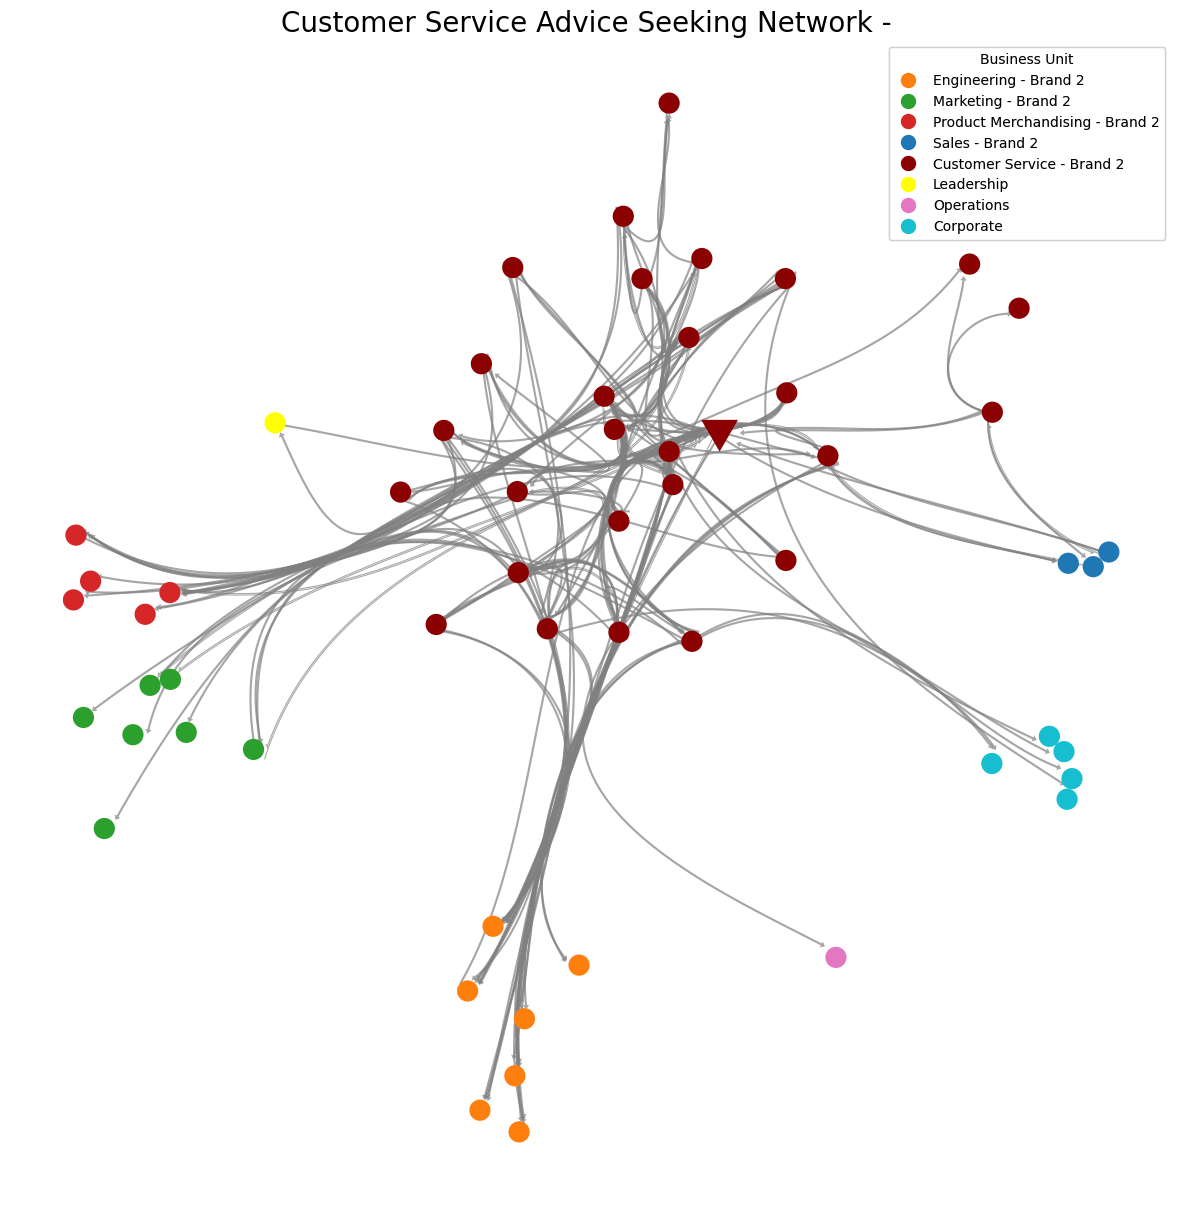

In [97]:
np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(cs_net,
      node_color=node_color_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.2, arrows=True, edge_color='gray',  #node_size=1,
      node_size=node_size, node_shape=node_shape,
)
# Create proxy artists for legend handles.

node_proxy_artists = []
for node in keys:
    proxy = plt.Line2D(
        [], [],
        linestyle='None',
        color=nodeLegend[node],
        marker='o',
        markersize=10,
        label=node
    )
    node_proxy_artists.append(proxy)

node_legend = ax.legend(handles=node_proxy_artists, loc='upper right', title='Business Unit')
ax.add_artist(node_legend)
plt.title('Customer Service Advice Seeking Network - ', fontsize = 20)
plt.show()

In [98]:
#mg = [3021660, 2003036, 2003148, 3042370, 2003155, 2003173]
mg_cs = [2003173]
mg_eng =[3021660]
mg_mkt = [3042370, 2003148]
mg_pm = [2003155]

# node shape and size for Product Merchandising Team
node_shape_pm ={}
sf_em = list(hr_df['Employee ID'])
for i in sf_em:
    if i in mg_pm:
        node_shape_pm[i] = 'v'
    else:
        node_shape_pm[i] = 'o'
node_size_pm = {}
for i in sf_em:
    if i in mg_pm:
        node_size_pm[i] = 2
    else:
        node_size_pm[i] = 1

# retrive PM team network connection
pm_net = team_net(pm_team)

Product Merchandising Team Network Connection within Team Team and among other Teams

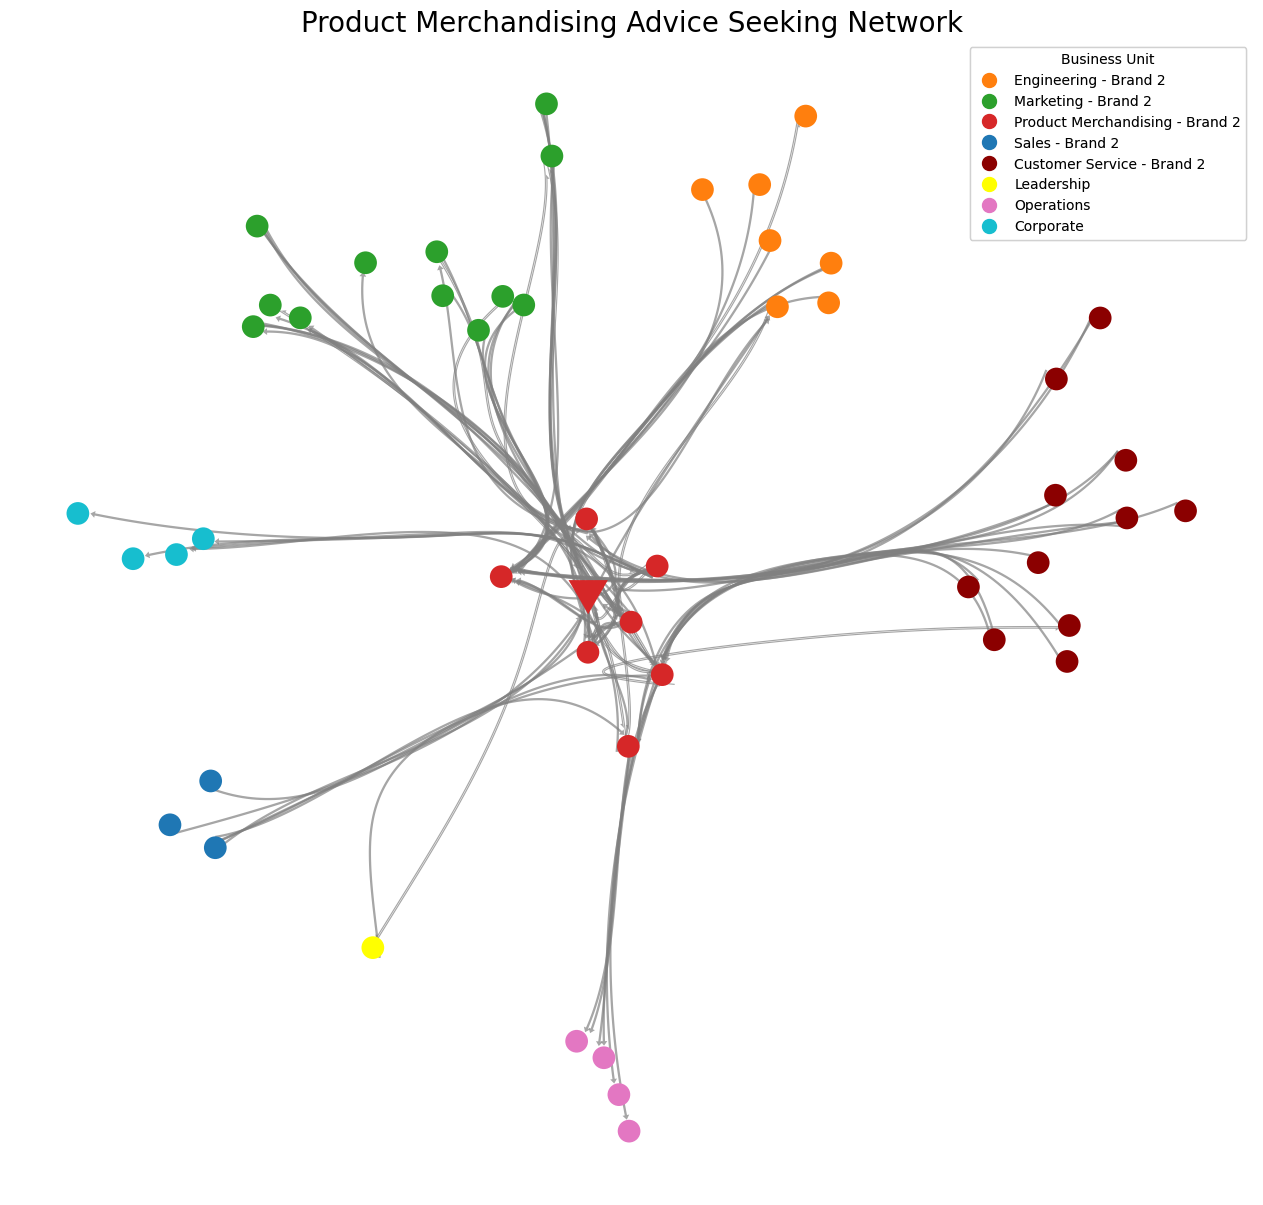

In [100]:
#plot Product Merchandising Team Network Connection within Team Team and with other Teams
# using differnt node shape to identify team manager

np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(pm_net,
      node_color=node_color_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.2, arrows=True, edge_color='gray',
      node_size=node_size_pm, node_shape=node_shape_pm,
)

# Create proxy artists for legend handles.

node_proxy_artists = []
for node in keys:
    proxy = plt.Line2D(
        [], [],
        linestyle='None',
        color=nodeLegend[node],
        marker='o',
        markersize=10,
        label=node
    )
    node_proxy_artists.append(proxy)

node_legend = ax.legend(handles=node_proxy_artists, loc='upper right', title='Business Unit')
ax.add_artist(node_legend)
plt.title('Product Merchandising Advice Seeking Network', fontsize = 20)
plt.show()

Engineering Team Network Connection within Team Team and among other Teams

In [101]:
mg_eng =[3021660]

# node shape and size for Engineering Team
node_shape_eng ={}
sf_em = list(hr_df['Employee ID'])
for i in sf_em:
    if i in mg_eng:
        node_shape_eng[i] = 'v'
    else:
        node_shape_eng[i] = 'o'
node_size_eng = {}
for i in sf_em:
    if i in mg_eng:
        node_size_eng[i] = 2
    else:
        node_size_eng[i] = 1


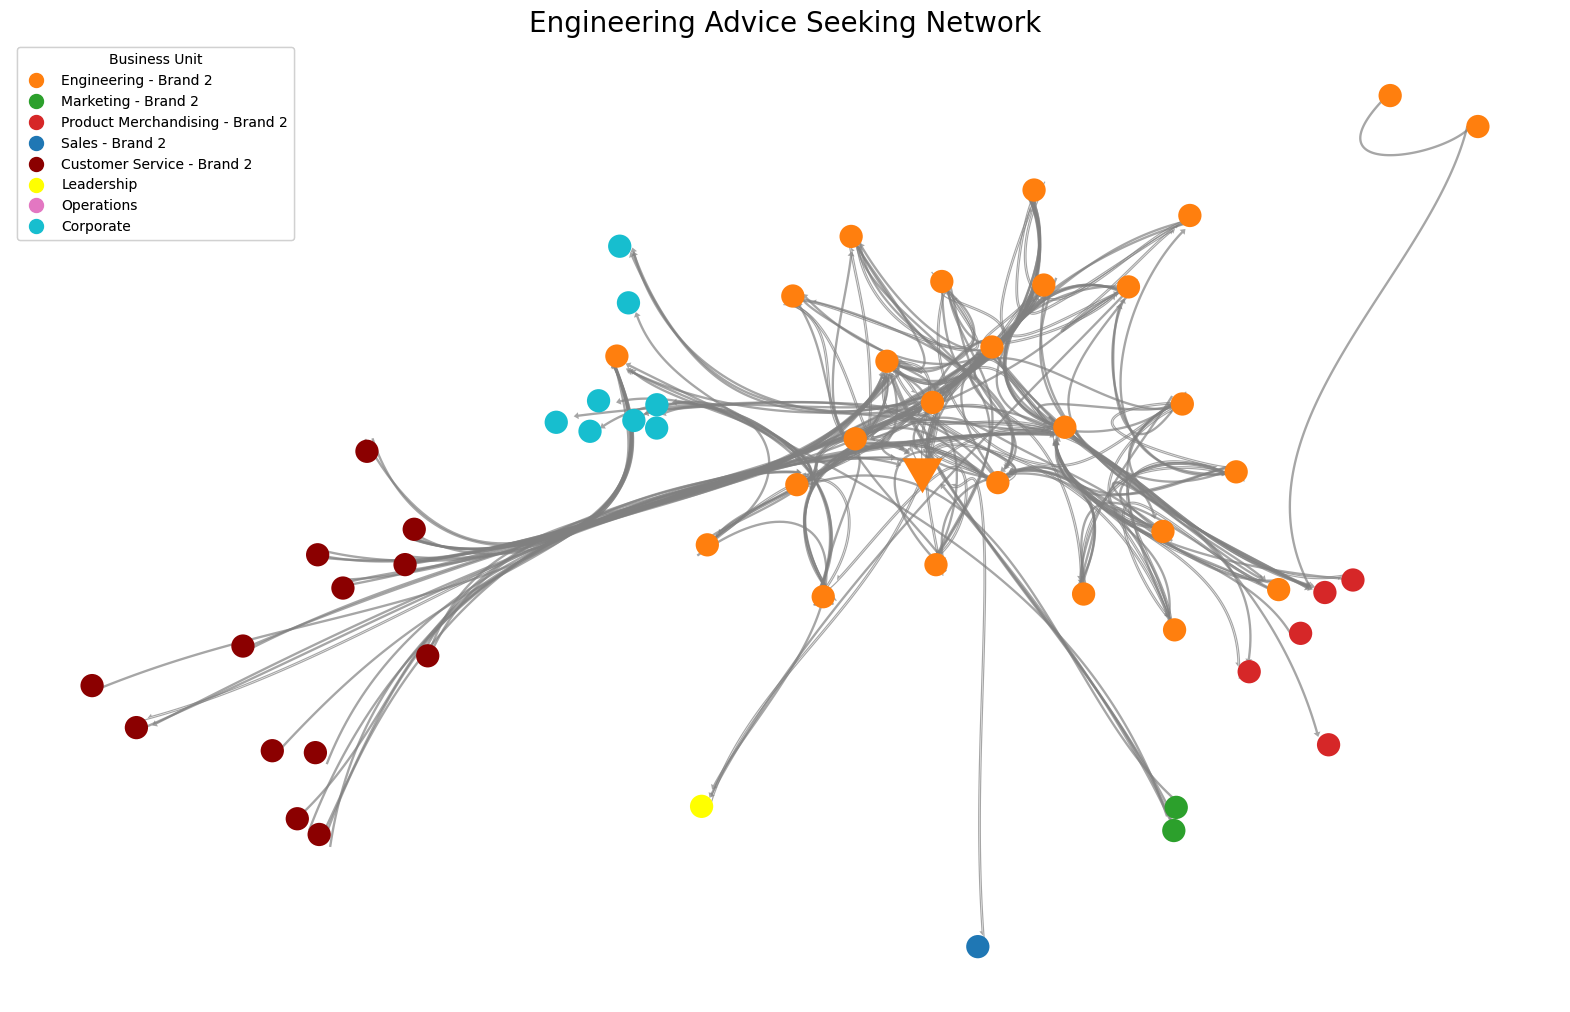

In [102]:
# retrieve network connection for engineering team

eng_net = team_net(eng_team)

#plot eng network within team among other business unit

np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(eng_net,
      node_color=node_color_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.2, arrows=True, edge_color='gray',
      node_size=node_size_eng, node_shape=node_shape_eng,
)
# Create proxy artists for legend handles.

node_proxy_artists = []
for node in keys:
    proxy = plt.Line2D(
        [], [],
        linestyle='None',
        color=nodeLegend[node],
        marker='o',
        markersize=10,
        label=node
    )
    node_proxy_artists.append(proxy)

node_legend = ax.legend(handles=node_proxy_artists, loc='upper left', title='Business Unit')
ax.add_artist(node_legend)
plt.title('Engineering Advice Seeking Network', fontsize = 20)
plt.show()

Marketing Team Network Connection within Team Team and among other Teams

In [103]:
mg_mkt = [3042370, 2003148]

# node shape and size for Marketing Team
node_shape_mkt ={}
sf_em = list(hr_df['Employee ID'])
for i in sf_em:
    if i in mg_mkt:
        node_shape_mkt[i] = 'v'
    else:
        node_shape_mkt[i] = 'o'
node_size_mkt = {}
for i in sf_em:
    if i in mg_mkt:
        node_size_mkt[i] = 2
    else:
        node_size_mkt[i] = 1

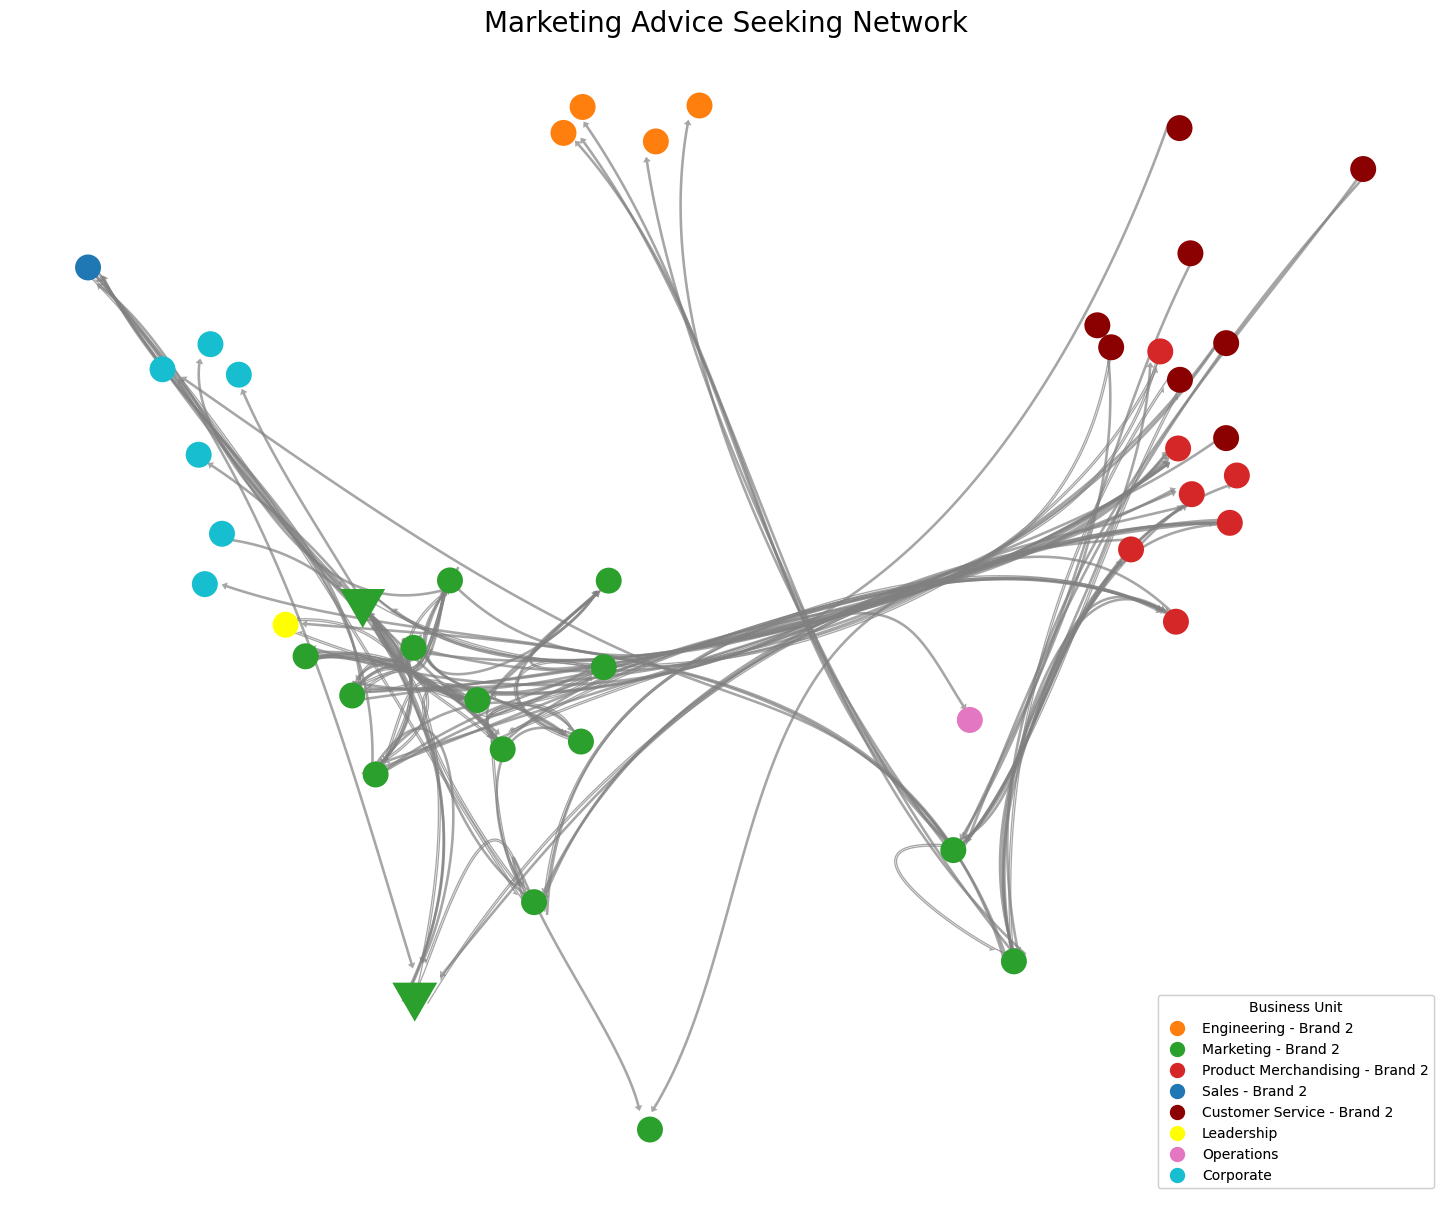

In [105]:
mkt_net = team_net(mkt_team)

np.random.seed(0)

fig, ax = plt.subplots(figsize=(20, 15))
ax.axis("off")
Graph(mkt_net,
      node_color=node_color_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='bundled', edge_layout_kwargs=dict(k=2000),
      edge_width=0.2, arrows=True, edge_color='gray',
      node_size=node_size_mkt, node_shape=node_shape_mkt,
)
# Create proxy artists for legend handles.

node_proxy_artists = []
for node in keys:
    proxy = plt.Line2D(
        [], [],
        linestyle='None',
        color=nodeLegend[node],
        marker='o',
        markersize=10,
        label=node
    )
    node_proxy_artists.append(proxy)

node_legend = ax.legend(handles=node_proxy_artists, loc='lower right', title='Business Unit')
ax.add_artist(node_legend)
plt.title('Marketing Advice Seeking Network', fontsize = 20)
plt.show()

Sales Team Network Connection within Team Team and among other Teams

In [106]:
mg_sale = [2003036]

# node shape and size for sales Team
node_shape_sale ={}
sf_em = list(hr_df['Employee ID'])
for i in sf_em:
    if i in mg_sale:
        node_shape_sale[i] = 'v'
    else:
        node_shape_sale[i] = 'o'
node_size_sale = {}
for i in sf_em:
    if i in mg_sale:
        node_size_sale[i] = 2
    else:
        node_size_sale[i] = 1

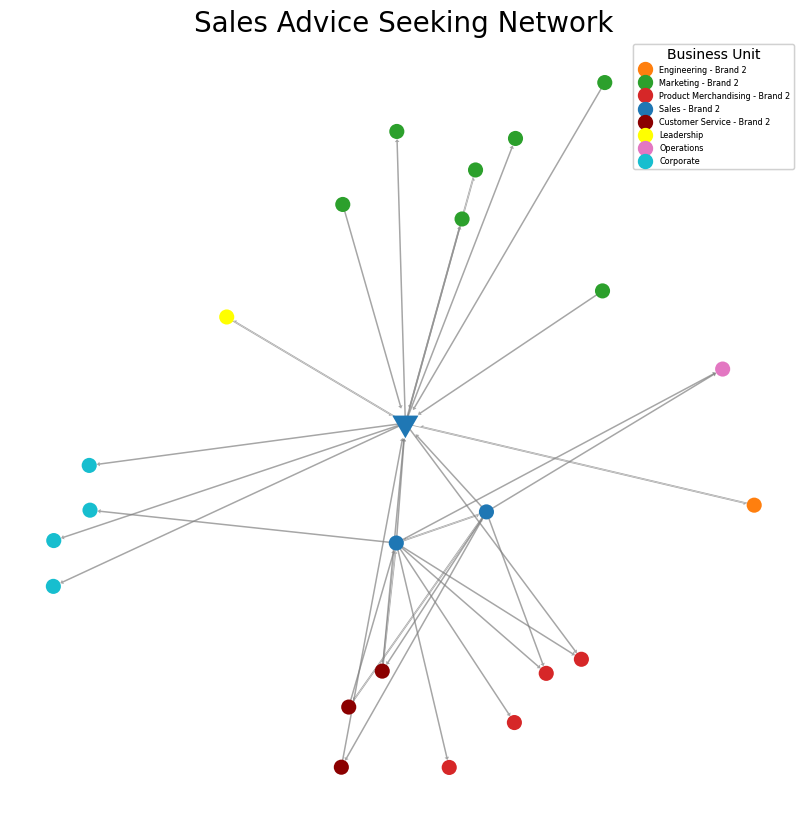

In [107]:
sale_net = team_net(sales_team)

np.random.seed(0)

fig, ax = plt.subplots(figsize=(15, 10))
ax.axis("off")
Graph(sale_net,
      node_color=node_color_1, node_edge_width=0, edge_alpha=0.7,
      node_layout='community', node_layout_kwargs=dict(node_to_community=dic_1),
      edge_layout='straight', edge_layout_kwargs=dict(k=2000),
      edge_width=0.2, arrows=True, edge_color='gray',
      node_size=node_size_sale, node_shape=node_shape_sale,
)
# Create proxy artists for legend handles.

node_proxy_artists = []
for node in keys:
    proxy = plt.Line2D(
        [], [],
        linestyle='None',
        color=nodeLegend[node],
        marker='o',
        markersize=10,
        label=node
    )
    node_proxy_artists.append(proxy)

node_legend = ax.legend(handles=node_proxy_artists, loc='upper right', title='Business Unit', fontsize='xx-small')
ax.add_artist(node_legend)
plt.title('Sales Advice Seeking Network', fontsize = 20)
plt.show()

##### Calculate percentage of each employee's bridge function based on the number of connection outside of team

In [114]:
#create a function to calculate the each team member's bridge function by percentage
# parameter 1 - teams: dataframe that includes a team's within team and among teams connetions;
# parameter 2 - oteam: dataframe that only has within team connection
# parameter 2 - name: define the name of interesting team

def percent_out(teams, oteam, name):
    out_cont = teams[(teams['Business Unit level 2_recipient'] != str(name))|
                     (teams['Business Unit level 2_adviser'] != str(name))]
    ids = oteam
    #list(oteam['Employee ID_recipient'].unique())
    dic_p = {}
    for i in ids:
        df = out_cont[(out_cont['Employee ID_recipient'] == i)|
                  (out_cont['Employee ID_adviser'] == i)]
        lens = len(df)
        x = hr_df[hr_df['Employee ID'] == i]
        dic_p[i] = (x['Position Title'].iloc[0], round(lens/len(out_cont), 2))
    return dic_p

In [115]:
sale_p = percent_out(sales_team, s_members, 'Salse - Brand 2')
sale_p

{2003112: ('Sr. Account Service Manager I', 0.32),
 3025972: ('Sr. Account Service Manager I', 0.24),
 2003036: ('Director, Sales', 0.54)}

In [116]:
cs_p = percent_out(custom_team, cs_members, 'Customer Service - Brand 2')
vs = []
for i in list(cs_p.keys()):
    a = cs_p[i][1]
    vs.append(a)
sum(vs)
dict(sorted(cs_p.items(), key=lambda item: item[1][1], reverse=True))


{2003173: ('Sr. Manager, Customer Service', 0.14),
 2003137: ('Spvsr, Customer Service I', 0.11),
 3029400: ('Customer Service Representative 3', 0.08),
 2002893: ('Customer Service Representative 4', 0.08),
 3029869: ('Workforce Analyst I', 0.07),
 2003109: ('Lead Customer Service Representative 5', 0.06),
 2003136: ('Customer Service Representative 3', 0.06),
 2003156: ('Manager, Customer Service', 0.06),
 2002910: ('Customer Service Representative 4', 0.05),
 2003193: ('Spvsr, Customer Service I', 0.05),
 3031823: ('Customer Service Representative 3', 0.04),
 3029349: ('Customer Service Representative 4', 0.04),
 2002936: ('Customer Service Representative 4', 0.02),
 3021784: ('Customer Service Representative 3', 0.02),
 2002724: ('Lead Customer Service Representative 5', 0.02),
 2003199: ('Customer Service Representative 4', 0.02),
 2002210: ('Customer Service Representative 4', 0.02),
 2002252: ('Customer Service Representative 3', 0.02),
 2003171: ('Customer Service Representativ

In [117]:
eng_p = percent_out(eng_team, eng_members, 'Engineering - Brand 2')
eng_p
dict(sorted(eng_p.items(), key=lambda item: item[1][1], reverse=True))

{3021660: ('Sr. Director, eCommerce', 0.17),
 2002394: ('Manager, Product Management', 0.15),
 2002605: ('Product Manager', 0.15),
 3023646: ('Product Specialist II', 0.14),
 2003000: ('Sr. Product Specialist I', 0.07),
 2003186: ('Product Specialist II', 0.07),
 3027478: ('Product Manager', 0.07),
 3029814: ('Director, UX Design', 0.04),
 3042739: ('Sr. Principal Data Engineer', 0.04),
 3038672: ('Sr. Data Engineer I', 0.03),
 2002909: ('Sr. Principal Designer - UX Design', 0.03),
 3031524: ('Director, Engineering', 0.01),
 2000237: ('Art Director II', 0.01),
 3022906: ('Sr. Software Development Engineer II', 0.0),
 3025961: ('Sr. Software Development Engineer I', 0.0),
 2002937: ('Sr. Software Development Engineer I', 0.0),
 3044059: ('Sr. Manager, Engineering', 0.0),
 3043340: ('Software Development Engineer II', 0.0),
 3023032: ('Sr. Software Development Engineer II', 0.0),
 3030382: ('Principal Software Development Engineer', 0.0),
 3034698: ('Sr. Software Development Engineer I',

In [118]:
mkt_p = percent_out(mkt_team, mkt_members, 'Marketing - Brand 2')

dict(sorted(mkt_p.items(), key=lambda item: item[1][1], reverse=True))

{2002166: ('Partner Marketing Specialist I', 0.18),
 3029900: ('Sr. Manager, Channel Marketing', 0.15),
 2003148: ('Sr. Director, Marketing', 0.14),
 3042370: ('Director, Growth - Brand 2', 0.11),
 3042755: ('Manager, CRM', 0.11),
 3022260: ('Graphic Designer I', 0.08),
 2002643: ('Manager, Marketing', 0.07),
 3044041: ('Sr. Social Media Specialist II', 0.07),
 2003115: ('Social Media Specialist I', 0.03),
 2002934: ('Sr. Marketing Specialist II', 0.03),
 2003133: ('Sr. Manager, Brand Marketing', 0.03),
 2002680: ('Collaborations Specialist I', 0.01),
 3045090: ('CRM Manager II', 0.01),
 2002620: ('Sr. Graphic Designer I', 0.0),
 2003122: ('Graphic Designer II', 0.0),
 3031620: ('Graphic Designer I', 0.0)}

In [119]:
pm_p = percent_out(pm_team, pm_members, 'Product Merchandising - Brand 2')

dict(sorted(pm_p.items(), key=lambda item: item[1][1], reverse=True))

{2003018: ('Sr. Manager, Merchandising', 0.2),
 3020739: ('Manager, Product Sourcing', 0.19),
 2003209: ('Manager, Merchandising', 0.15),
 2003155: ('Director, Business Line', 0.14),
 3007231: ('Merchandising Specialist I', 0.1),
 3033414: ('Sr. Merchandising Specialist I', 0.08),
 3043751: ('Merchandising Specialist II', 0.07),
 2002939: ('Product Sourcing Analyst II', 0.07)}

##### Connections within a team

In [125]:
# set a node color for each team in the Brand 2

bluenodes = list(set(list(seng['Employee ID'])).intersection(
        list(only_eng['Employee ID_recipient'])+list(only_eng['Employee ID_adviser'])))
greennodes = list(set(list(smt['Employee ID'])).intersection(
        list(only_mkt['Employee ID_recipient'])+list(only_mkt['Employee ID_adviser'])))
yellowgreennodes = list(set(list(spm['Employee ID'])).intersection(
        list(only_pm['Employee ID_recipient'])+list(only_pm['Employee ID_adviser'])))
orangenodes = list(set(list(ssale['Employee ID'])).intersection(
        list(only_sales['Employee ID_recipient'])+list(only_sales['Employee ID_adviser'])))
pinknodes = list(set(list(scs['Employee ID'])).intersection(
        list(only_cus['Employee ID_recipient'])+list(only_cus['Employee ID_adviser'])))

# define a function for generating network graph within a team

def only_team(df, G, name, nodeslist, color):
    pos = nx.spring_layout(G, iterations=15, seed=1721)
    fig, ax = plt.subplots(figsize=(20, 15))
    ax.axis("off")

    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodeslist, ax = ax, node_size = 400,
                           node_color=str(color), label=str(name))
    nx.draw_networkx_edges(G, pos=pos, edge_color= 'skyblue', 
                            width=2.0)
    plt.legend(scatterpoints = 1)
    plt.title("Only " + str(name) + " Team's Network Graph", fontsize = 25)
    return plt.show()

Network Connection within Customer Service Team

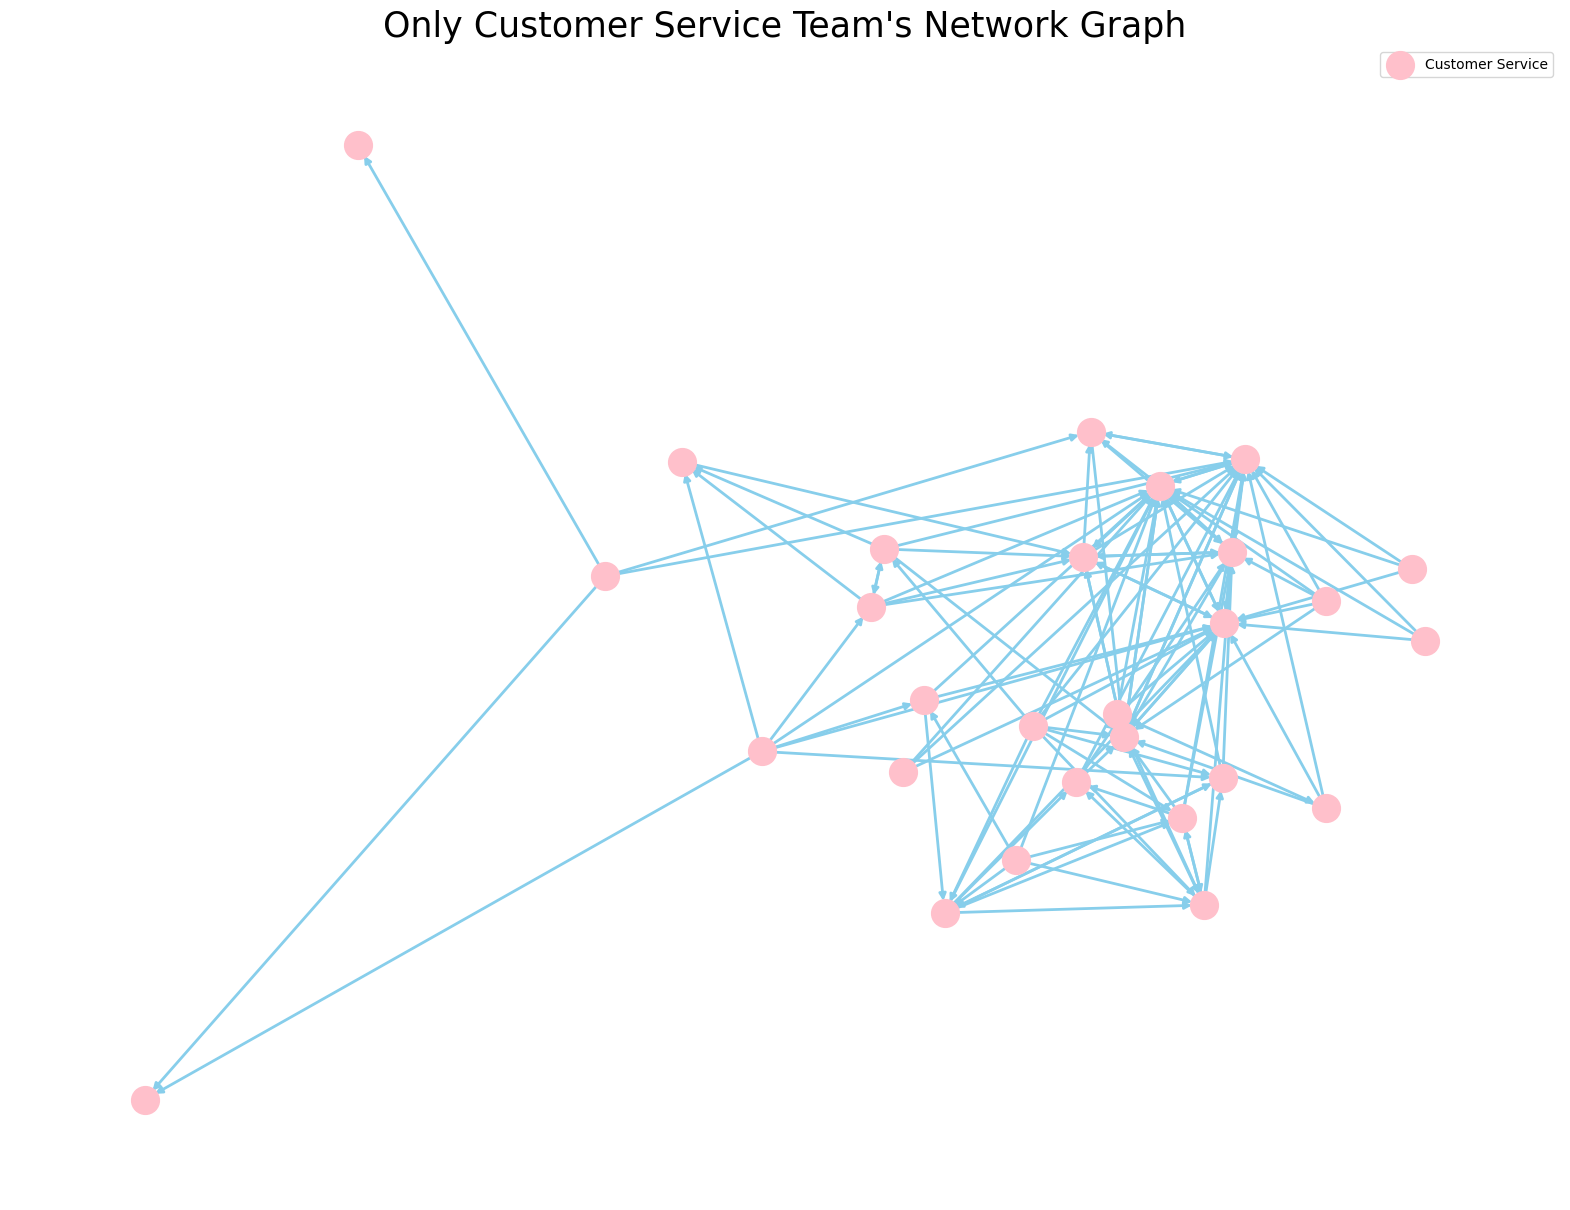

In [126]:
only_cs_team = only_team(only_cus, OCG, 'Customer Service', pinknodes, 'pink')
only_cs_team

Network Connection within Engineering Team

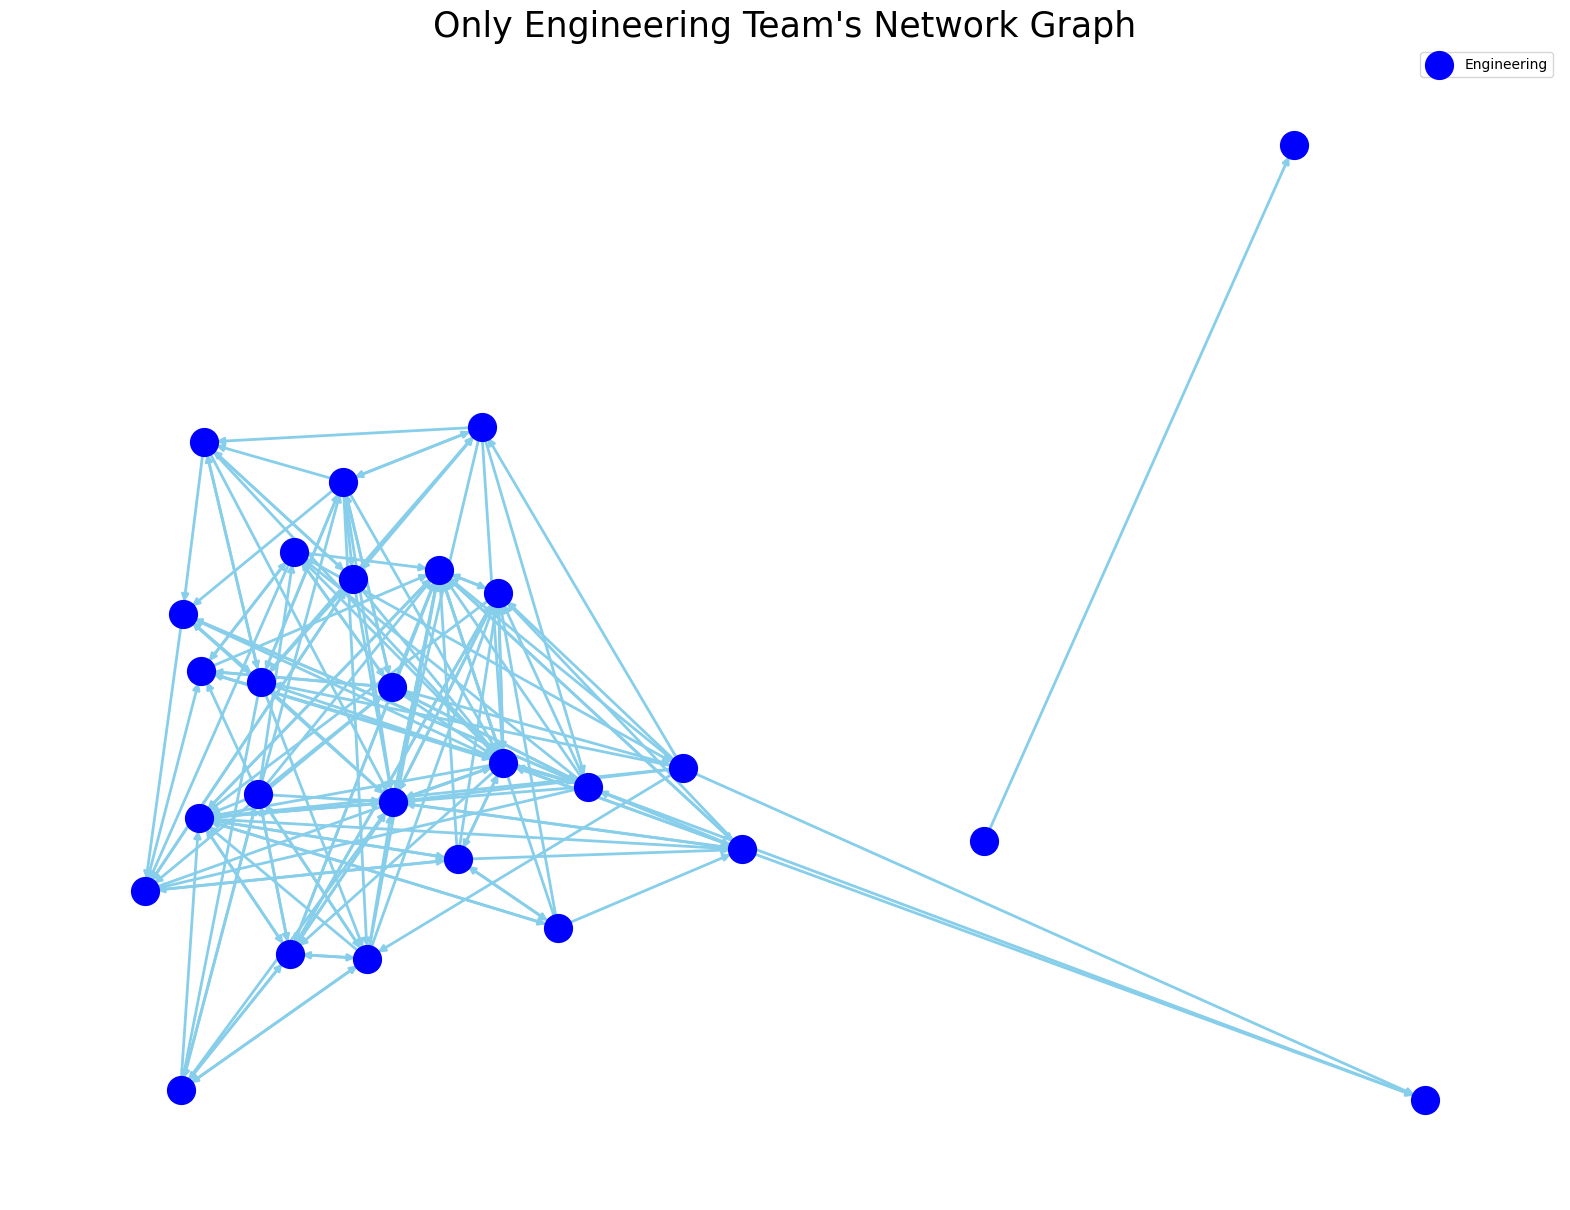

In [127]:
only_eng_team = only_team(only_eng, OEG, 'Engineering', bluenodes, 'blue')
only_eng_team

Network Connection within Marketing Team

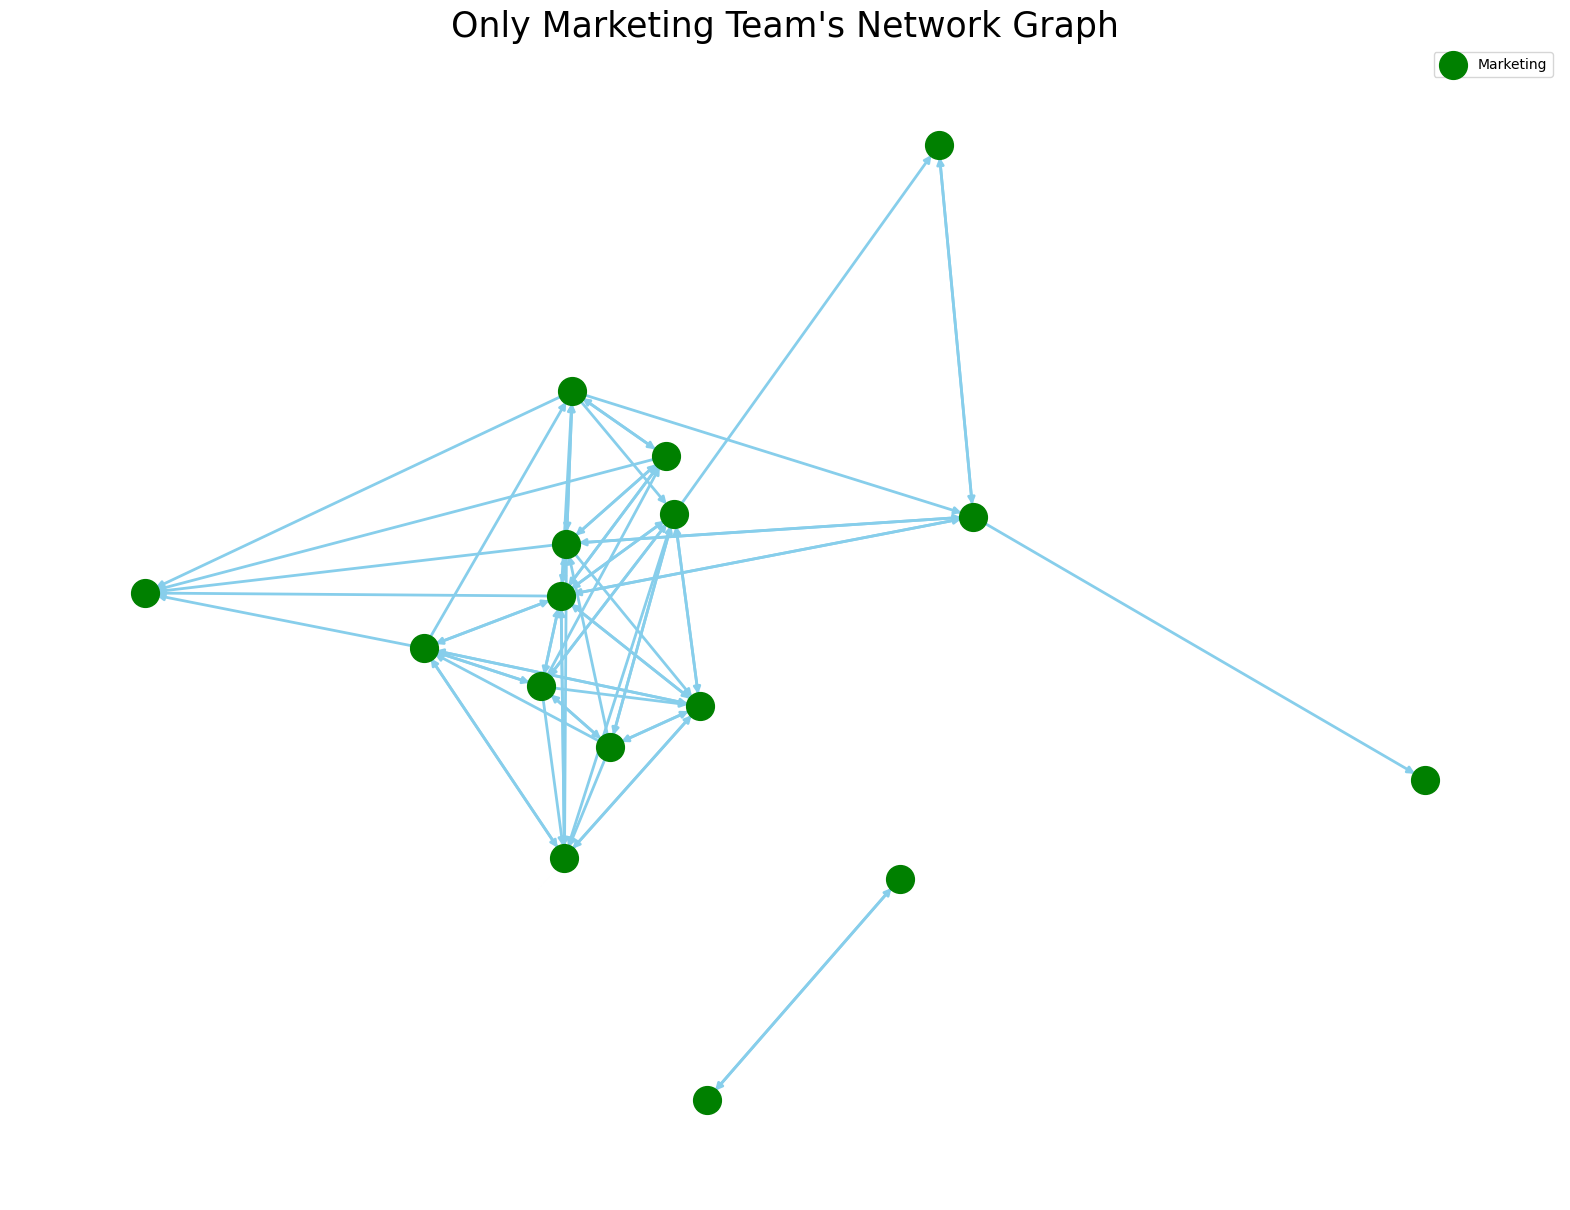

In [128]:
only_mkt_team = only_team(only_mkt, OMG, 'Marketing', greennodes, 'green')
only_mkt_team

Network Connection within Product Merchandishing Team

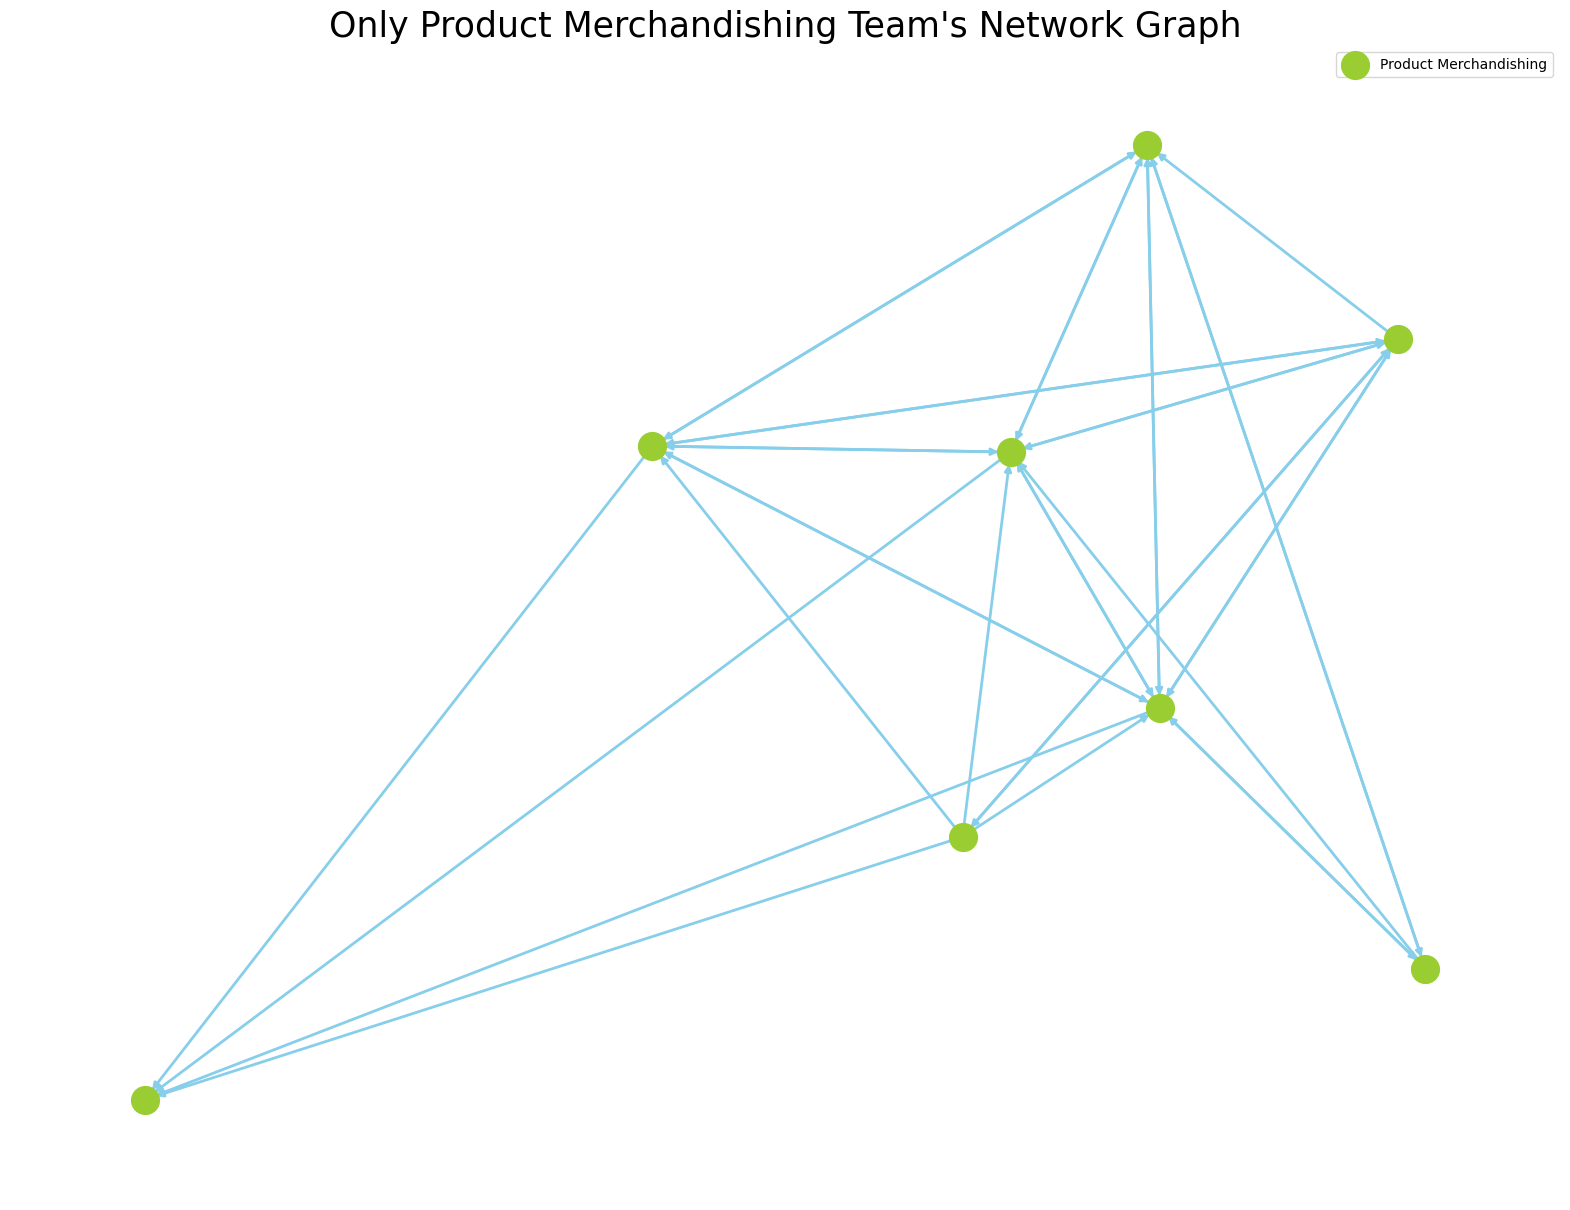

In [129]:
only_pm_team = only_team(only_pm, OPG, 'Product Merchandishing', yellowgreennodes, 'yellowgreen')
only_pm_team

Network Connection within Sales Team

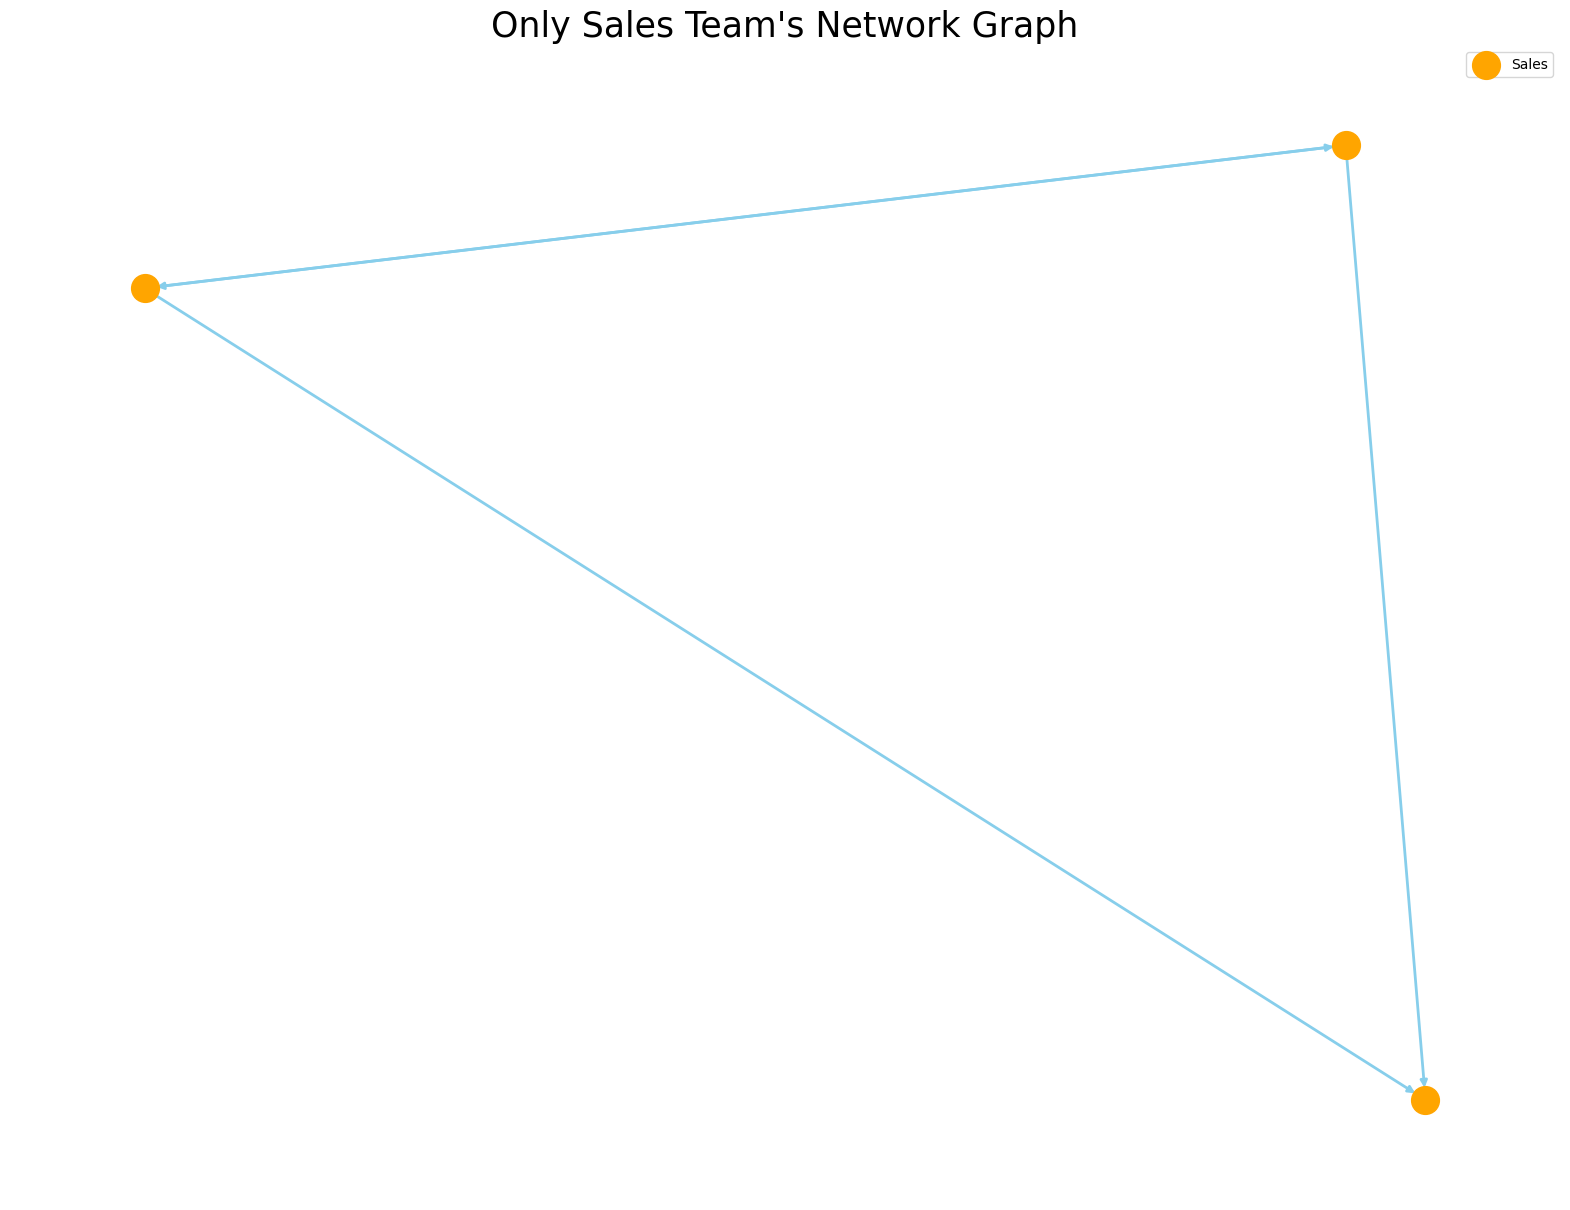

In [130]:
only_sales_team = only_team(only_sales, OSG, 'Sales', orangenodes, 'orange')
only_sales_team

#### Team Comparison in aspect of the the network metrics:

* Global Efficiency
* The Ratio of Internal to External communication: Silo Signature and Innovation Signature
* Density
* Diameter
* clustering coefficient

##### Team's global efficiency

The global efficiency of a network is a scaled measure that ranges from 0–1, with a value of 1 indicating maximum global efficiency. It's defined as the average of inverse distances between all pairs of vertices in a network, where the inverse distance between pairs that are not reachable from each other is considered to be zero.

In [133]:

G_list = [CSG, EG, MG, PG, SG]

team_compare = pd.DataFrame()
team_compare['Team'] = ['Customer Service','Engineering',
                        'Marketing', 'Product Merchandising',
                        'Sales']
nnodes = []
ndegrees = []
avgnodes = []
avglenghs =[]


for i in G_list:
    num_n = i.number_of_nodes()
    nnodes.append(num_n)

    num_e = i.number_of_edges()
    ndegrees.append(num_e)

    avg_n = np.mean([d for _, d in i.degree()])
    avgnodes.append(avg_n)

    shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(i))
    average_path_lengths = [
        np.mean(list(spl.values())) for spl in shortest_path_lengths.values()
        ]
    overall_avg = np.mean(average_path_lengths)
    avglenghs.append(overall_avg)
    
    
team_compare['Number of Team Member'] = [28, 27, 16, 8, 3]
team_compare['Number of Nodes'] = nnodes
team_compare['Number of Edges'] = ndegrees
team_compare['Avg Nodes'] = avgnodes
team_compare['Avg Lenghs'] = avglenghs

team_compare

Team  Number of Team Member  Number of Nodes  \
0       Customer Service                     28               57   
1            Engineering                     27               57   
2              Marketing                     16               44   
3  Product Merchandising                      8               50   
4                  Sales                      3               24   

   Number of Edges  Avg Nodes  Avg Lenghs  
0              199   6.982456    1.298657  
1              230   8.070175    1.851758  
2              140   6.363636    1.465776  
3              119   4.760000    1.460741  
4               37   3.083333    0.845058

#### The Ratio of Internal to External communication

In [134]:

inte = [OCG, OEG, OMG, OPG, OSG]
exte = [CSG, EG, MG, PG, SG]
ratio = []
for i, j in zip(inte, exte):
    external = j.number_of_edges() - i.number_of_edges()
    edge_ratio = i.number_of_edges()/external
    ratio.append(edge_ratio) 
team_compare['edges Ratio'] = ratio
team_compare

Team  Number of Team Member  Number of Nodes  \
0       Customer Service                     28               57   
1            Engineering                     27               57   
2              Marketing                     16               44   
3  Product Merchandising                      8               50   
4                  Sales                      3               24   

   Number of Edges  Avg Nodes  Avg Lenghs  edges Ratio  
0              199   6.982456    1.298657     1.369048  
1              230   8.070175    1.851758     2.239437  
2              140   6.363636    1.465776     0.891892  
3              119   4.760000    1.460741     0.383721  
4               37   3.083333    0.845058     0.121212

#### Team Performance Metric

* Internal Density: We compute the density of the subgraph formed by the team members. This captures the level of interconnectedness within the team.
* bwtween team Density: We compute the density of the subgraph formed by the team members. This captures the level of interconnectedness within and bwtween the team.
* External Range: We count the unique external connections each team member has outside the team. This measures how well team members can reach out to external experts.

In [135]:

inte = [OCG, OEG, OMG, OPG, OSG]
exte = [CSG_sf, EG_sf, MG_sf, PG_sf, SG_sf]
s_exte = [CSG, EG, MG, PG, SG]

density_w = []
density_bw = []
density_shu = []

for j in inte:
    den= nx.density(j)
    density_w.append(den)

for j in exte:
    den= nx.density(j)
    density_bw.append(den)

for j in s_exte:
    den= nx.density(j)
    density_shu.append(den)



team_compare['Density within T'] = density_w
team_compare['Density between SP'] = density_bw
team_compare['Density between SH'] = density_shu
team_compare

Team  Number of Team Member  Number of Nodes  \
0       Customer Service                     28               57   
1            Engineering                     27               57   
2              Marketing                     16               44   
3  Product Merchandising                      8               50   
4                  Sales                      3               24   

   Number of Edges  Avg Nodes  Avg Lenghs  edges Ratio  Density within T  \
0              199   6.982456    1.298657     1.369048          0.152116   
1              230   8.070175    1.851758     2.239437          0.226496   
2              140   6.363636    1.465776     0.891892          0.275000   
3              119   4.760000    1.460741     0.383721          0.589286   
4               37   3.083333    0.845058     0.121212          0.666667   

   Density between SP  Density between SH  
0            0.080944            0.062343  
1            0.109635            0.072055  
2            0.111742            0.073996  
3            0.092473            0.048571  
4            0.090643            0.067029

In [136]:
def compute_external_range(G, team_members):
    """
    Compute the external range of a team within a graph.
    G: NetworkX graph
    team_members: List of nodes representing the team members
    """
    external_connections = set()
    for member in team_members:
        for neighbor in G.neighbors(member):
            if neighbor not in team_members:
                external_connections.add(neighbor)
    return len(external_connections)

In [137]:
lists_t = [cs_members, eng_members, mkt_members, pm_members, s_members]
external_r = []
for i in lists_t:
    ranges = compute_external_range(CG, i)
    external_r.append(ranges)
team_compare['External Range'] = external_r

#### Clustering Effects

The clustering coefficient of a node is defined as the probability that two randomly selected employees of nodes are connected with each other. As a result, the average clustering coefficient is the average of clustering coefficients of all the nodes. The closer the average clustering coefficient is to 1, the more complete the network graph will be because there’s just one giant component. Moreover, it is a sign of triadic closure because the more complete the graph is, the more triangles will usually occur.

In [138]:
cluster_w = []
cluster_bw = []

for j in inte:
    clus= nx.average_clustering(j)
    cluster_w.append(clus)

for j in exte:
    clus= nx.average_clustering(j)
    cluster_bw.append(clus)

team_compare['Clustering within Team'] = cluster_w
team_compare['Clustering between Teams'] = cluster_bw
team_compare

Team  Number of Team Member  Number of Nodes  \
0       Customer Service                     28               57   
1            Engineering                     27               57   
2              Marketing                     16               44   
3  Product Merchandising                      8               50   
4                  Sales                      3               24   

   Number of Edges  Avg Nodes  Avg Lenghs  edges Ratio  Density within T  \
0              199   6.982456    1.298657     1.369048          0.152116   
1              230   8.070175    1.851758     2.239437          0.226496   
2              140   6.363636    1.465776     0.891892          0.275000   
3              119   4.760000    1.460741     0.383721          0.589286   
4               37   3.083333    0.845058     0.121212          0.666667   

   Density between SP  Density between SH  External Range  \
0            0.080944            0.062343              29   
1            0.109635            0.072055              15   
2            0.111742            0.073996              22   
3            0.092473            0.048571              19   
4            0.090643            0.067029              18   

   Clustering within Team  Clustering between Teams  
0                0.394343                  0.311886  
1                0.404652                  0.454984  
2                0.403859                  0.302248  
3                0.737244                  0.431252  
4                0.666667                  0.219472

In [139]:

def cluster_hist(G, name):
    plt.figure(figsize= (8, 6))
    plt.hist(nx.clustering(G).values(), bins=50, label=str(name))
    plt.title("Clustering Coefficient Histogram - " + str(name), fontdict={"size": 15})
    plt.xlabel("Clustering Coefficient", fontdict={"size": 12})
    plt.ylabel("Counts", fontdict={"size": 12})
    plt.legend()
    return plt.show()

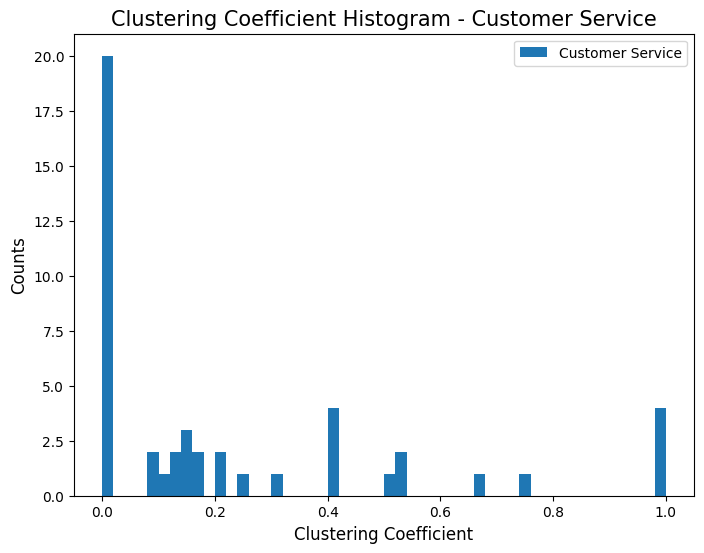

In [110]:
cs_clueff = cluster_hist(CSG_sf, 'Customer Service')
cs_clueff

#### Customer Service Team Clustering Coefficient:


 50 bins were used to showcase the distribution. The bin with the highest counts concerns nodes with clustering coefficient close to 0.02 as there are 20 nodes in that bin. In addition, the bins of clustering coefficient between 0.0 and 0.4 contain the majority of nodes by far. It seems like that only 5 nodes has clustering coefficient near 1.0.



##### Different centrality values for each observation at team level

I use an undirected graph to calculate the different centrality measurements since the directed graph is causing convergence issues. However, this approach has some implications:

### Pros:
1. **Simplified Calculations**: Undirected graphs often simplify the calculations and may help avoid convergence issues.
2. **Symmetry**: Treating the graph as undirected can provide a more balanced view of node importance, considering all connections equally.

### Cons:
1. **Loss of Directional Information**: Converting a directed graph to an undirected one means losing the directionality of edges, which can be crucial for understanding the flow of influence or information.
2. **Potential Misinterpretation**: The results might not accurately reflect the true centrality in the context of the original directed network.


In [140]:
def centrality_dataframe(Graph):

    # Degree------------------------------------------------------------------
    connections = dict(Graph.degree)
    # Degree centrality value-------------------------------------------------
    degree_team = nx.degree_centrality(Graph)
    # closeness centrality value----------------------------------------------
    closeness_team = nx.closeness_centrality(Graph)
    # betweeness centrality value---------------------------------------------
    betweeness_team = nx.betweenness_centrality(Graph)
    # Eigenvector Centrality value--------------------------------------------
    eigen_team = nx.eigenvector_centrality(Graph)
    #PageRank Centrality value -----------------------------------------------
    pgrn_team = nx.pagerank(Graph, alpha=0.9)

    # Normalising the values--------------------------------------------------
    max_val_deg = max(degree_team.items(), key=lambda item: item[1])
    max_val_close = max(closeness_team.items(), key=lambda item: item[1])
    max_val_between = max(betweeness_team.items(), key=lambda item: item[1])
    max_val_eigen = max(eigen_team.items(), key=lambda item: item[1])
    max_val_pgrn = max(pgrn_team.items(), key = lambda item:item[1])

    # Creating empty dictionaries
    deg_scaled ={}
    close_scaled ={}
    between_scaled={}
    eigen_scaled ={}
    pagerank_scaled={}

    for key in eigen_team.keys():
        deg_scaled[key] = degree_team[key]/max_val_deg[1]
        close_scaled[key] = closeness_team[key]/max_val_close[1]
        between_scaled[key] = betweeness_team[key]/max_val_between[1]
        eigen_scaled[key] = eigen_team[key]/max_val_eigen[1]
        pagerank_scaled[key] = pgrn_team[key]/max_val_pgrn[1]


    # Creating dataframe of number of connections-------------------------------
    df=pd.DataFrame.from_dict(connections.items())
    df.columns=["Employee ID", "Connections"]
    # Creating dataframe of degree centrality-----------------------------------
    df1=pd.DataFrame.from_dict(deg_scaled.items())
    df1.columns=["Employee ID", "Degree"]
    # Creating dataframe of closeness centrality--------------------------------
    df2=pd.DataFrame.from_dict(close_scaled.items())
    df2.columns=["Employee ID", "Closeness"]
    # Creating dataframe of Betweeness centrality-------------------------------
    df3=pd.DataFrame.from_dict(between_scaled.items())
    df3.columns=["Employee ID", "Betweenness"]
    # Creating dataframe of Eigenvector centrality------------------------------
    df4=pd.DataFrame.from_dict(eigen_scaled.items())
    df4.columns=["Employee ID", "Eigenvector"]
     # Creating dataframe of PageRank centrality------------------------------
    df5=pd.DataFrame.from_dict(pagerank_scaled.items())
    df5.columns=["Employee ID", "PageRank"]


    # merging all the dataframes------------------------------------------------
    data = [df1, df2,df3,df4, df5]

    for dataframe in data:
        df = df.merge(dataframe, on="Employee ID")
        
    return df

##### Combining centrality dataframe with the organization's hr employee data.

In [141]:
def centrality_team(G, name):
    centrality_emp = centrality_dataframe(G)
    emp=hr_df.copy()
    centrality_employees = emp.merge(centrality_emp, on='Employee ID')
    # Selecting only people who are in the team
    centrality_team = centrality_employees[
        centrality_employees['Business Unit level 2'] == str(name)].reset_index(drop=True)
    return centrality_team

In [168]:
# Customer service team's centrality measurements results

centrality_cs_team = centrality_team(ICSG_sf, 'Customer Service - Brand 2')
centrality_cs_team.head()

Employee ID On Site Frequency                          Position Title  \
0      2003109      Fully Remote  Lead Customer Service Representative 5   
1      2002435      Fully Remote       Customer Service Representative 3   
2      2002910            Hybrid       Customer Service Representative 4   
3      2002936            Hybrid       Customer Service Representative 4   
4      2003171      Fully Remote       Customer Service Representative 4   

  Date in service Business Unit level 1       Business Unit level 2 team_abr  \
0      2021-01-25               Brand 2  Customer Service - Brand 2    CS_B2   
1      2020-09-03               Brand 2  Customer Service - Brand 2    CS_B2   
2      2020-05-26               Brand 2  Customer Service - Brand 2    CS_B2   
3      2020-08-10               Brand 2  Customer Service - Brand 2    CS_B2   
4      2021-07-19               Brand 2  Customer Service - Brand 2    CS_B2   

   Connections  Degree  Closeness  Betweenness  Eigenvector  PageRank  
0           12    0.48   0.764045     0.147259     0.606514  0.452049  
1            9    0.36   0.755556     0.036594     0.584991  0.332298  
2           11    0.44   0.680000     0.062232     0.528795  0.405534  
3            8    0.32   0.660194     0.057015     0.328847  0.314754  
4            4    0.16   0.666667     0.010003     0.270093  0.175047

In [167]:
# Engineering team's centrality measurements results

centrality_eng_team = centrality_team(IEG_sg, 'Engineering - Brand 2')
centrality_eng_team.head()

Employee ID On Site Frequency                        Position Title  \
0      3022906      Fully Remote  Sr. Software Development Engineer II   
1      3038672            Hybrid                   Sr. Data Engineer I   
2      2002909            Hybrid    Sr. Principal Designer - UX Design   
3      3031524      Fully Remote                 Director, Engineering   
4      3025961      Fully Remote   Sr. Software Development Engineer I   

  Date in service Business Unit level 1  Business Unit level 2 team_abr  \
0      2022-07-18             Corporate  Engineering - Brand 2   ENG_B2   
1      2023-09-18             Corporate  Engineering - Brand 2   ENG_B2   
2      2015-11-18             Corporate  Engineering - Brand 2   ENG_B2   
3      2022-11-28             Corporate  Engineering - Brand 2   ENG_B2   
4      2022-08-29             Corporate  Engineering - Brand 2   ENG_B2   

   Connections    Degree  Closeness  Betweenness  Eigenvector  PageRank  
0            8  0.333333   0.714286     0.016789     0.455987  0.308097  
1            6  0.250000   0.681818     0.017899     0.349305  0.254467  
2           11  0.458333   0.810811     0.093742     0.634621  0.429924  
3           18  0.750000   0.909091     0.276026     0.926944  0.667048  
4            7  0.291667   0.674157     0.014131     0.376091  0.272619

In [166]:
# Marketing team's centrality measurements results

centrality_market_team = centrality_team(IMG_sf, 'Marketing - Brand 2')
centrality_market_team.head()

Employee ID On Site Frequency                  Position Title  \
0      2003115            Hybrid       Social Media Specialist I   
1      2002680            Hybrid     Collaborations Specialist I   
2      3029900      Fully Remote  Sr. Manager, Channel Marketing   
3      2002934            Hybrid     Sr. Marketing Specialist II   
4      2002166            Hybrid  Partner Marketing Specialist I   

  Date in service Business Unit level 1 Business Unit level 2 team_abr  \
0      2021-03-01               Brand 2   Marketing - Brand 2   MKT_B2   
1      2020-06-16               Brand 2   Marketing - Brand 2   MKT_B2   
2      2022-11-14               Brand 2   Marketing - Brand 2   MKT_B2   
3      2013-10-16               Brand 2   Marketing - Brand 2   MKT_B2   
4      2014-09-29               Brand 2   Marketing - Brand 2   MKT_B2   

   Connections    Degree  Closeness  Betweenness  Eigenvector  PageRank  
0            8  0.727273   0.776316     0.076500     0.744628  0.517703  
1            7  0.636364   0.766234     0.206308     0.669702  0.474817  
2           10  0.909091   0.907692     0.659601     0.235608  0.839238  
3            7  0.636364   0.766234     0.023804     0.710569  0.447985  
4           11  1.000000   0.880597     1.000000     0.248264  1.000000

In [165]:
# Product Merchandising team's centrality measurements results

centrality_product_team = centrality_team(IPG_sf, 'Product Merchandising - Brand 2')
centrality_product_team.head()

Employee ID On Site Frequency                  Position Title  \
0      3020739      Fully Remote       Manager, Product Sourcing   
1      3043751            Hybrid     Merchandising Specialist II   
2      2002939            Hybrid     Product Sourcing Analyst II   
3      3033414      Fully Remote  Sr. Merchandising Specialist I   
4      3007231            Hybrid      Merchandising Specialist I   

  Date in service Business Unit level 1            Business Unit level 2  \
0      2022-03-28               Brand 2  Product Merchandising - Brand 2   
1      2024-03-18               Brand 2  Product Merchandising - Brand 2   
2      2020-11-30               Brand 2  Product Merchandising - Brand 2   
3      2023-04-10               Brand 2  Product Merchandising - Brand 2   
4      2021-03-15               Brand 2  Product Merchandising - Brand 2   

  team_abr  Connections  Degree  Closeness  Betweenness  Eigenvector  PageRank  
0    PM_B2           15  0.9375   0.956522     1.000000     0.774498  1.000000  
1    PM_B2           11  0.6875   0.897959     0.208456     0.854833  0.659419  
2    PM_B2            6  0.3750   0.733333     0.073592     0.446924  0.385764  
3    PM_B2            8  0.5000   0.846154     0.155761     0.673664  0.494449  
4    PM_B2           12  0.7500   0.814815     0.391756     0.747179  0.749114

In [164]:
# Sales team's centrality measurements results

centrality_sales_team = centrality_team(ISG_sf, 'Sales - Brand 2')
centrality_sales_team.head()

Employee ID On Site Frequency                 Position Title  \
0      2003112            Hybrid  Sr. Account Service Manager I   
1      3025972      Fully Remote  Sr. Account Service Manager I   
2      2003036            Hybrid                Director, Sales   

  Date in service Business Unit level 1 Business Unit level 2  team_abr  \
0      2021-05-10               Brand 2       Sales - Brand 2  Sales_B2   
1      2022-08-22               Brand 2       Sales - Brand 2  Sales_B2   
2      2021-02-15               Brand 2       Sales - Brand 2  Sales_B2   

   Connections    Degree  Closeness  Betweenness  Eigenvector  PageRank  
0            8  0.571429   0.785714     0.392562     0.764197  0.532276  
1            6  0.428571   0.733333     0.128099     0.704166  0.391134  
2           14  1.000000   1.000000     1.000000     1.000000  1.000000

In [169]:
# define a function that can sort out top 5 centrality measuremnt for each team

def five_signature(G, name):
    team = centrality_team(G, str(name))
    proactive = team.sort_values(by= 'Degree', ascending=False)[:5]
    
    central = team.sort_values(by= 'Closeness', ascending=False)[:5]
    
    connectors = team.sort_values(by= 'Betweenness', ascending=False)[:5]
    
    rich_tiers = team.sort_values(by= 'Eigenvector', ascending=False)[:5]
    
    influencer = team.sort_values(by= 'PageRank', ascending=False)[:5]
    
    return proactive, central, connectors, rich_tiers,  influencer

In [171]:
cs1, cs2, cs3, cs4, cs5 = five_signature(ICSG, 'Customer Service - Brand 2')
eng1, eng2, eng3, eng4, eng5 = five_signature(IEG, 'Engineering - Brand 2')
market1, market2, market3, market4, market5 = five_signature(IMG, 'Marketing - Brand 2')
pm1, pm2, pm3, pm4, pm5 = five_signature(IPG, 'Product Merchandising - Brand 2')
sales1, sales2, sales3, sales4, sales5 = five_signature(ISG, 'Sales - Brand 2')




In [172]:
## define a function that can show bottom 5 centrality measuremnt for each team

def last_five(G, name):
    team = centrality_team(G, str(name))
    proactive = team.sort_values(by= 'Degree', ascending=False)[-5:]
    
    central = team.sort_values(by= 'Closeness', ascending=False)[-5:]
    
    connectors = team.sort_values(by= 'Betweenness', ascending=False)[-5:]
    
    rich_tiers = team.sort_values(by= 'Eigenvector', ascending=False)[-5:]
    
    influencer = team.sort_values(by= 'PageRank', ascending=False)[-5:]
    
    return proactive, central, connectors, rich_tiers,  influencer

In [173]:
market_1, market_2, market_3, market_4, market_5 = last_five(MG, 'Marketing - Brand 2')

##### Top 5 employees with high value of degree centrality in customer service team, engineering team, marketing team, product merchandising team, sales team, respectively.

In [174]:
# Top 5 employees with high value of degree centrality in customer service team
# color the background of a DataFrame in a gradient style, 
# to help visualize data more effectively by highlighting variations in values.

cs1.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [175]:
# Top 5 employees with high value of degree centrality in engineering team.

eng1.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [176]:
# Top 5 employees with high value of degree centrality in marketing team.

market1.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [177]:
#Top 5 employees with high value of degree centrality in product merchandising team.

pm1.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [178]:
# Top 5 employees with high value of degree centrality in sales team.

sales1.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

##### Top 5 employees with high value of closeness centrality in each team

In [179]:
# Top 5 employees with high value of closeness centrality in customer service team.

cs2.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')


In [180]:
# Top 5 employees with high value of closeness centrality in engineering team.

eng2.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [181]:
# Top 5 employees with high value of closeness centrality in marketing team.

market2.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [182]:
# Top 5 employees with high value of closeness centrality in product merchandising team.

pm2.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')


In [183]:
# Top 5 employees with high value of closeness centrality in sales team.

sales2.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

##### Top 5 employees with high value of betweenness centrality in each team

In [184]:
# Top 5 employees with high value of betweenness centrality in customer service team.

cs3.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector','PageRank'], cmap='flare')

In [185]:
# Top 5 employees with high value of betweenness centrality in engineering team.

eng3.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [186]:
# Top 5 employees with high value of betweenness centrality in marketing team.

market3.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [187]:
# Top 5 employees with high value of betweenness centrality in product merchandising team.

pm3.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')


In [188]:
# Top 5 employees with high value of betweenness centrality in sales team.

sales3.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

##### Top 5 employees with high value of eiganvector centrality in each team

In [189]:
# Top 5 employees with high value of eiganvector centrality in customer service team.

cs4.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [190]:
# Top 5 employees with high value of eiganvector centrality in engineering team.

eng4.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector','PageRank'], cmap='flare')

In [191]:
# Top 5 employees with high value of eiganvector centrality in marketing team.

market4.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [192]:
# Top 5 employees with high value of eiganvector centrality in product merchandising team.

pm4.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

In [193]:
# Top 5 employees with high value of eiganvector centrality in sales team.

sales4.style.background_gradient(subset=['Connections', 'Degree','Closeness',
                                      'Betweenness','Eigenvector', 'PageRank'], cmap='flare')

##### Using netowrk graph to visualize different type of important people in each team

In [194]:
# defining a graph function for centrality measures result at team level

def cen_team(df, df1,df2, df3, df4, df5, G, name):
    subnodelist = list(df1['Employee ID'][:1]) + list(df2['Employee ID'][:1]) + list(df3['Employee ID'][:1]) + list(df4['Employee ID'][:1]) + list(df5['Employee ID'][:1])
    em_list = list(hr_df[hr_df['Business Unit level 2'] == str(name)]['Employee ID'])
    new_list = [x for x in em_list if x not in subnodelist]
    poslist = list(df1['Position Title'][:1]) + list(df2['Position Title'][:1]) + list(df3['Position Title'][:1]) + list(df4['Position Title'][:1]) + list(df5['Position Title'][:1])
    labels = {subnodelist[k]:poslist[k] for k in range(len(poslist))} 
    pos = nx.spring_layout(G, iterations=15, seed=1721)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.axis("off")
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(df1['Employee ID'][:1]), ax = ax, node_size = 2000, 
                           node_color='orange', label='Degree Centrality', alpha =0.3, node_shape="*")
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(df2['Employee ID'][:1]), ax = ax, node_size = 450,
                       node_color='red', label='Closeness Centrality', alpha =0.5, node_shape='>')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(df3['Employee ID'][:1]), ax = ax, node_size = 200,
                       node_color='blue', label='Betweenness Centrality', alpha =0.6, node_shape='s')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(df4['Employee ID'][:1]), ax = ax, node_size = 300,
                       node_color='green', label='Eigenvector Centrality',alpha =0.7, node_shape='d')
    nx.draw_networkx_nodes(G, pos=pos, nodelist=list(df5['Employee ID'][:1]), ax = ax, node_size = 100,
                       node_color='yellow', label='PageRank', alpha =0.8)
    nx.draw_networkx_nodes(G, pos=pos, nodelist=new_list, ax = ax, node_size = 100,
                       node_color='skyblue', label='Others')
    nx.draw_networkx_edges(G, pos=pos, edge_color='gray',#df['relevanceScore'],
                            width=1.0)#, edge_cmap=plt.cm.Blues)
    nx.draw_networkx_labels(G,pos=pos, labels=labels, font_weight="bold", font_size=8)
    plt.legend(scatterpoints = 1, loc='best')
    plt.title(str(name) + ' Network Graph', fontsize = 16)
    return plt.show()

The organization Customer Service Team's centrality signature distribution

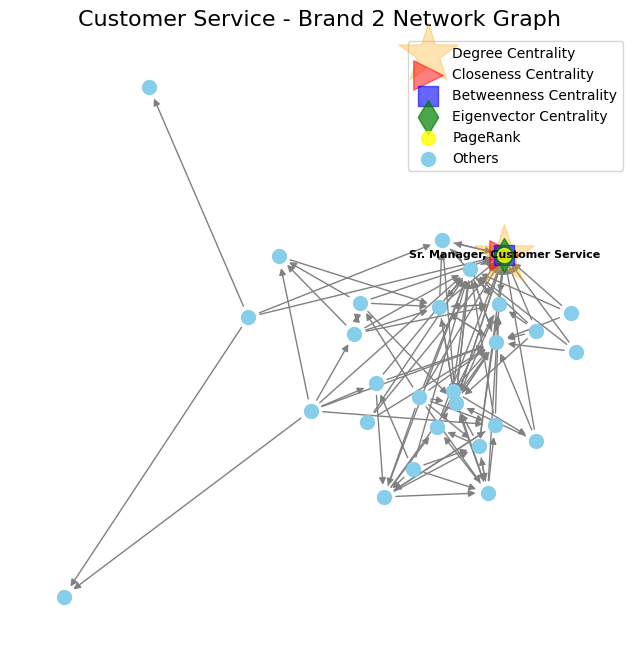

In [195]:
cen_team(only_cus, cs1, cs2, cs3, cs4, cs5, OCG, 'Customer Service - Brand 2')

The Organization Engineering Team's centrality signature distribution

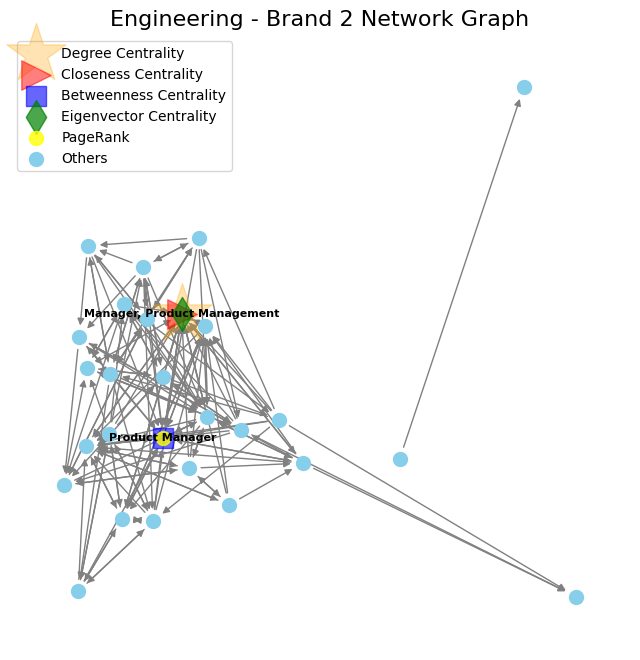

In [196]:
cen_team(only_eng, eng1, eng2, eng3, eng4, eng5, OEG, 'Engineering - Brand 2')

The Organization Marketing Team's centrality signature distribution

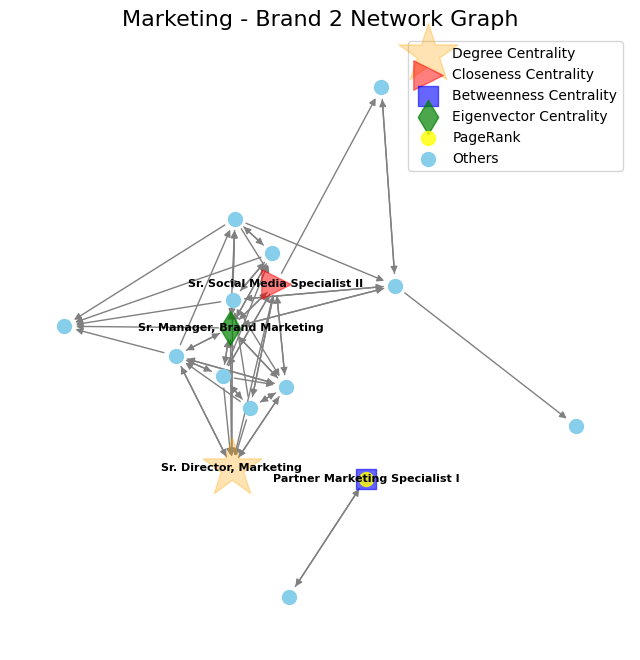

In [197]:

cen_team(only_mkt, market1, market2, market3, market4, market5, OMG, 'Marketing - Brand 2')

The Organization Product Merchandising Team's centrality signature distribution

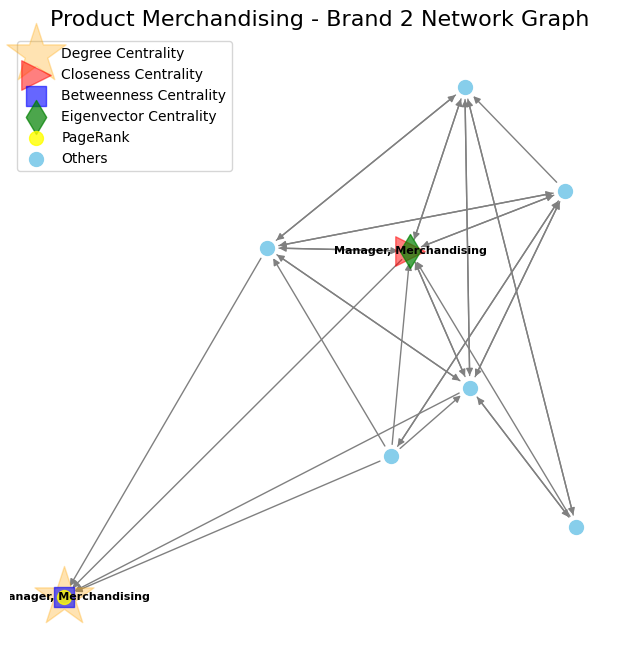

In [198]:

cen_team(only_pm, pm1, pm2, pm3, pm4, pm5, OPG, 'Product Merchandising - Brand 2')

The Organization Sales Team's centrality signature distribution

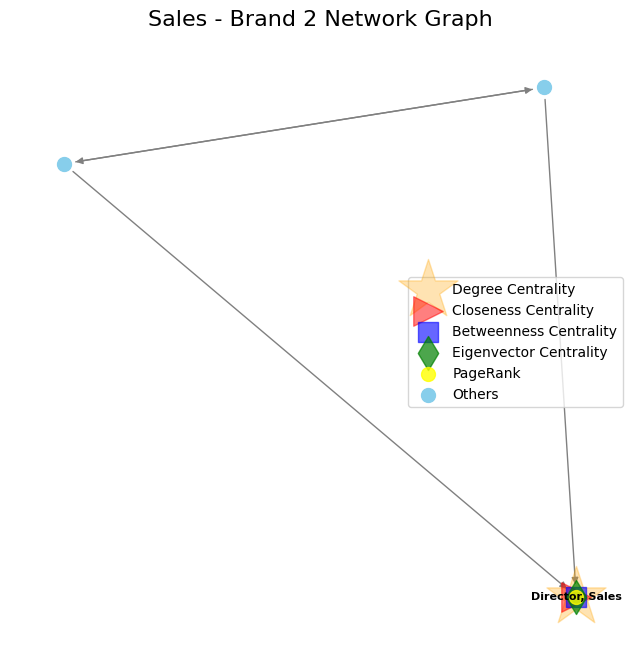

In [199]:

cen_team(only_sales, sales1, sales2, sales3, sales4, sales5, OSG, 'Sales - Brand 2')